# Problem Statement 
## Objectives 
A leading agri-tech company, AgroTech Innovations, faces significant challenges in optimising crop yields and resource management due to inefficiencies in their controlled environment farming systems.  
  
Despite having advanced sensor technologies, the company seeks to enhance its operational efficiency and support future research and development initiatives.  
  
As a machine learning engineer at AgroTech Innovations, you are tasked with developing machine learning models to address these challenges. Your goal is to create models to predict the temperature conditions within the farm's closed environment, ensuring optimal plant growth. Additionally, you will  
develop models to categorise the combined "Plant Type-Stage" based on sensor data, aiding in strategic planning and resource allocation.  
  
By implementing these models, you will help AgroTech Innovations improve crop management, optimise resource usage, and increase yield predictability. These efforts will not only enhance current operations but also provide valuable insights for future agricultural innovations.  
  
In your submission, you are expected to evaluate at least two suitable models for each task and justify your choices based on the dataset provided.  

# Task 1 - Exploratory Data Analysis (EDA) 
Using the dataset specified in the Dataset section at page 6, conduct an EDA and create an interactive 
notebook (.ipynb file) in Python that can be used as a presentation to explain the findings of your analysis. 

  It should contain appropriate visualisations and explanations to assist readers in understanding how these 
elaborations are arrived at and their implications. 

#### Extracting and exploring data

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, MetaData
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Define database path
#db_path = "C:/NTU/y2s2/internships/AI past year - no show/data/agri.db"

# Create engine and connect to database
engine = create_engine(f"sqlite:///agri.db")
conn = engine.connect()

# Load metadata
metadata = MetaData()
metadata.reflect(bind=engine)

# Get all table names
table_names = list(metadata.tables.keys())
print("Tables in database:", table_names)

# Select the first table (or specify the one you need)
if table_names:
    table_name = table_names[0]  # Change this if needed
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    print(df.head())  # Show first few rows
else:
    print("No tables found in the database.")

# Close connection
conn.close()

Tables in database: ['farm_data']
  System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
1     

In [2]:
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
1                         441.0               938              2.13   
2                         562.0              1246              1.21   
3                         651.0              1346              1.96   
4                         144.0               812              2.76   

   O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                4                     161                      64   
1                6                     161                      53   
2                8                     228                      79   
3                6                    None                  53 ppm   
4                5                      61                      19   

  Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                     201        6.1                28.150346  
1                    None        6.5                31.000000  
2                     292        6.4                26.000000  
3                     289        6.6                      NaN  
4                     168        5.5                28.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

In [4]:
df.describe()

Temperature Sensor (°C)  Humidity Sensor (%)  \
count             48800.000000         18622.000000   
mean                 22.138201            69.243535   
std                   7.556981             5.725973   
min                 -28.570000            59.220000   
25%                  22.140000            64.340000   
50%                  23.210000            68.700000   
75%                  24.350000            74.117500   
max                  28.750000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  53211.000000      57489.000000      57489.000000   
mean                     397.841668       1083.376576          1.624435   
std                      222.923860        172.570351          0.415535   
min                     -799.000000        799.000000         -0.250000   
25%                      257.000000        950.000000          1.360000   
50%                      403.000000       1071.000000          1.650000   
75%                      553.000000       1178.000000          1.900000   
max                      800.000000       1500.000000          3.440000   

       O2 Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count     57489.000000  57489.000000             48847.000000  
mean          6.580842      6.021446                25.716878  
std           1.145534      0.400251                 5.815294  
min           3.000000      3.800000                10.001955  
25%           6.000000      5.800000                21.313361  
50%           7.000000      6.000000                26.000000  
75%           7.000000      6.300000                30.000000  
max          11.000000      7.800000                39.998717

In [5]:
print("Shape of data:",df.shape)

Shape of data: (57489, 15)


In [6]:
df.columns

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)', 'Humidity Sensor (%)',
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
       'O2 Sensor (ppm)', 'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)'],
      dtype='object')

In [7]:
df.dtypes

System Location Code             object
Previous Cycle Plant Type        object
Plant Type                       object
Plant Stage                      object
Temperature Sensor (°C)         float64
Humidity Sensor (%)             float64
Light Intensity Sensor (lux)    float64
CO2 Sensor (ppm)                  int64
EC Sensor (dS/m)                float64
O2 Sensor (ppm)                   int64
Nutrient N Sensor (ppm)          object
Nutrient P Sensor (ppm)          object
Nutrient K Sensor (ppm)          object
pH Sensor                       float64
Water Level Sensor (mm)         float64
dtype: object

In [8]:
for i in df:
    print(df[i])
    print(df[i].unique())
    print()

0        Zone_D
1        Zone_G
2        Zone_F
3        Zone_G
4        Zone_B
          ...  
57484    Zone_C
57485    Zone_C
57486    Zone_E
57487    Zone_G
57488    Zone_F
Name: System Location Code, Length: 57489, dtype: object
['Zone_D' 'Zone_G' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_A' 'Zone_E']

0                      Herbs
1                      Herbs
2                      Herbs
3                      Herbs
4                 Vine Crops
                ...         
57484             Vine Crops
57485             Vine Crops
57486                  Herbs
57487    Fruiting Vegetables
57488    Fruiting Vegetables
Name: Previous Cycle Plant Type, Length: 57489, dtype: object
['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']

0                 Vine Crops
1                 VINE CROPS
2                      herbs
3        fruiting vegetables
4               LEAFY GREENS
                ...         
57484    Fruiting Vegetables
57485    Fruiting Vegetables
57486             VINE CROP

#### Let's head into cleaning the data now

Realising some weird behaviour in the data such as varying value input and units included for continuous data, we will perform data cleaning by standardising the data types and and input values. 

In [9]:
#standardise the naming of plant type
df['Plant Type'] = df['Plant Type'].str.title()
df['Plant Stage'] = df['Plant Stage'].str.title()

#convert int to float
df['CO2 Sensor (ppm)'] = pd.to_numeric(df['CO2 Sensor (ppm)'], errors='coerce').astype('float64')

#removing unit "ppm"
toRemovePPM=['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)','Nutrient K Sensor (ppm)']
for col in toRemovePPM:
    df[col] = df[col].str.replace(' ppm', '', regex=True).astype(float)

Let's now check the behaviour of the data again

In [10]:
df.dtypes

System Location Code             object
Previous Cycle Plant Type        object
Plant Type                       object
Plant Stage                      object
Temperature Sensor (°C)         float64
Humidity Sensor (%)             float64
Light Intensity Sensor (lux)    float64
CO2 Sensor (ppm)                float64
EC Sensor (dS/m)                float64
O2 Sensor (ppm)                   int64
Nutrient N Sensor (ppm)         float64
Nutrient P Sensor (ppm)         float64
Nutrient K Sensor (ppm)         float64
pH Sensor                       float64
Water Level Sensor (mm)         float64
dtype: object

In [11]:
for i in df:
    print(df[i])
    print(df[i].nunique())
    print(df[i].unique())
    print()

0        Zone_D
1        Zone_G
2        Zone_F
3        Zone_G
4        Zone_B
          ...  
57484    Zone_C
57485    Zone_C
57486    Zone_E
57487    Zone_G
57488    Zone_F
Name: System Location Code, Length: 57489, dtype: object
7
['Zone_D' 'Zone_G' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_A' 'Zone_E']

0                      Herbs
1                      Herbs
2                      Herbs
3                      Herbs
4                 Vine Crops
                ...         
57484             Vine Crops
57485             Vine Crops
57486                  Herbs
57487    Fruiting Vegetables
57488    Fruiting Vegetables
Name: Previous Cycle Plant Type, Length: 57489, dtype: object
4
['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']

0                 Vine Crops
1                 Vine Crops
2                      Herbs
3        Fruiting Vegetables
4               Leafy Greens
                ...         
57484    Fruiting Vegetables
57485    Fruiting Vegetables
57486             Vine 

Let's now handle null values in the data.

In [12]:
df.isnull().sum()

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64

Text(0.5, 1.0, 'Graph of Number of null values with respect to its Variable')

<Figure size 700x700 with 0 Axes>

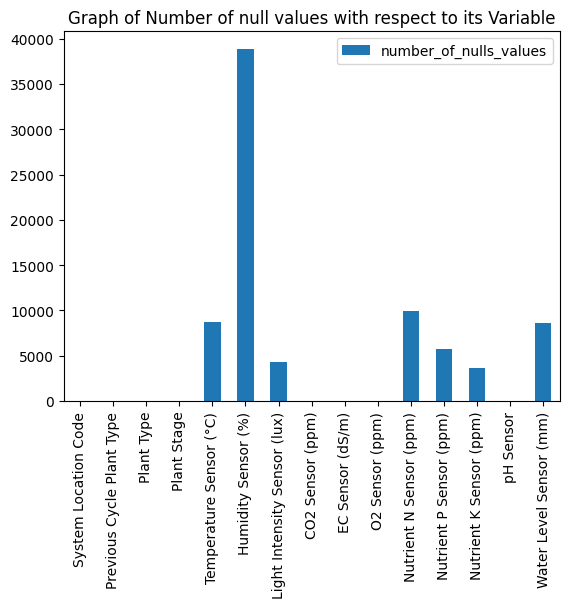

In [13]:
# Check for missing/null values in Dataset
null_df=pd.DataFrame(df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
null_df
# Ploting number of null values with its variable
plt.figure(figsize=(7,7))
null_df.plot(kind='bar')
plt.title('Graph of Number of null values with respect to its Variable')

In [14]:
# Percentage of null values
percentage_null_df=pd.DataFrame(round(df.isna().sum()*100/len(df),4)).rename(columns={0:'percentage_null_values'})
percentage_null_df

percentage_null_values
System Location Code                          0.0000
Previous Cycle Plant Type                     0.0000
Plant Type                                    0.0000
Plant Stage                                   0.0000
Temperature Sensor (°C)                      15.1142
Humidity Sensor (%)                          67.6077
Light Intensity Sensor (lux)                  7.4414
CO2 Sensor (ppm)                              0.0000
EC Sensor (dS/m)                              0.0000
O2 Sensor (ppm)                               0.0000
Nutrient N Sensor (ppm)                      17.3494
Nutrient P Sensor (ppm)                       9.9115
Nutrient K Sensor (ppm)                       6.4378
pH Sensor                                     0.0000
Water Level Sensor (mm)                      15.0324

Since we observe that the humidity sensor has >50% of null values, we will remove this column to ensure we still have sufficient data points to provide meaningful insights.  
  
Since the discrete numerical variables have null percentages of  
- Temperature Sensor (°C)	15.1142
- Light Intensity Sensor (lux)	7.4414
- Nutrient N Sensor (ppm)	17.3494
- Nutrient P Sensor (ppm)	9.9115
- Nutrient K Sensor (ppm)	6.4378
- Water Level Sensor (mm)	15.0324  
which are relatively small, we will conduct KNN to fill up the missing values.

**Why KNN?**   
KNN imputation finds the k-nearest neighbours (data points with the most similar features) to a data point with missing values. This would prevent us from losing too many data points which may result in us overlooking the important features and not being able to capture the complex relationships in the data. 

In [15]:
# dropping humidity sensor
df.drop(columns='Humidity Sensor (%)',inplace=True)

In [16]:
description1=df.describe()

In [17]:
# Columns to impute
columns_to_impute = [
    'Temperature Sensor (°C)',
    'Light Intensity Sensor (lux)',
    'Nutrient N Sensor (ppm)',
    'Nutrient P Sensor (ppm)',
    'Nutrient K Sensor (ppm)',
    'Water Level Sensor (mm)'
]

# Create KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Choose the number of neighbors (k)

# Impute missing values for the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
4               Zone_B                Vine Crops         Leafy Greens   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
1  Vegetative                   -24.16                         441.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
4    Seedling                    22.88                         144.0   

   CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
0             937.0              1.82                4   
1             938.0              2.13                6   
2            1246.0              1.21                8   
3            1346.0              1.96                6   
4             812.0              2.76                5   

   Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  \
0                    161.0                     64.0                    201.0   
1                    161.0                     53.0                    239.0   
2                    228.0                     79.0                    292.0   
3                    198.5                     53.0                    289.0   
4                     61.0                     19.0                    168.0   

   pH Sensor  Water Level Sensor (mm)  
0        6.1                28.150346  
1        6.5                31.000000  
2        6.4                26.000000  
3        6.6                28.500000  
4        5.5                28.000000

In [18]:
# check again of null values
percentage_null_df=pd.DataFrame(round(df.isna().sum()*100/len(df),4)).rename(columns={0:'percentage_null_values'})
percentage_null_df

percentage_null_values
System Location Code                             0.0
Previous Cycle Plant Type                        0.0
Plant Type                                       0.0
Plant Stage                                      0.0
Temperature Sensor (°C)                          0.0
Light Intensity Sensor (lux)                     0.0
CO2 Sensor (ppm)                                 0.0
EC Sensor (dS/m)                                 0.0
O2 Sensor (ppm)                                  0.0
Nutrient N Sensor (ppm)                          0.0
Nutrient P Sensor (ppm)                          0.0
Nutrient K Sensor (ppm)                          0.0
pH Sensor                                        0.0
Water Level Sensor (mm)                          0.0

In [19]:
description2=df.describe()

Let's check how KNN affects the data.  


In [20]:
print("Statistics of data before KNN:")
description1

Statistics of data before KNN:


Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count             48800.000000                  53211.000000   
mean                 22.138201                    397.841668   
std                   7.556981                    222.923860   
min                 -28.570000                   -799.000000   
25%                  22.140000                    257.000000   
50%                  23.210000                    403.000000   
75%                  24.350000                    553.000000   
max                  28.750000                    800.000000   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count      57489.000000      57489.000000     57489.000000   
mean        1083.376576          1.624435         6.580842   
std          172.570351          0.415535         1.145534   
min          799.000000         -0.250000         3.000000   
25%          950.000000          1.360000         6.000000   
50%         1071.000000          1.650000         7.000000   
75%         1178.000000          1.900000         7.000000   
max         1500.000000          3.440000        11.000000   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count             47515.000000             51791.000000   
mean                157.684205                49.858431   
std                  45.700829                15.414867   
min                  49.000000                19.000000   
25%                 124.000000                37.000000   
50%                 158.000000                50.000000   
75%                 190.000000                62.000000   
max                 250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             53788.000000  57489.000000             48847.000000  
mean                217.990277      6.021446                25.716878  
std                  60.697365      0.400251                 5.815294  
min                  99.000000      3.800000                10.001955  
25%                 170.000000      5.800000                21.313361  
50%                 215.000000      6.000000                26.000000  
75%                 266.000000      6.300000                30.000000  
max                 350.000000      7.800000                39.998717

In [21]:
print("Statistics of data after KNN:")
description2

Statistics of data after KNN:


Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count             57489.000000                  57489.000000   
mean                 22.197773                    394.688245   
std                   7.222136                    225.128814   
min                 -28.570000                   -799.000000   
25%                  22.165000                    258.000000   
50%                  23.220000                    402.000000   
75%                  24.320000                    549.000000   
max                  28.750000                    800.000000   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count      57489.000000      57489.000000     57489.000000   
mean        1083.376576          1.624435         6.580842   
std          172.570351          0.415535         1.145534   
min          799.000000         -0.250000         3.000000   
25%          950.000000          1.360000         6.000000   
50%         1071.000000          1.650000         7.000000   
75%         1178.000000          1.900000         7.000000   
max         1500.000000          3.440000        11.000000   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count             57489.000000             57489.000000   
mean                156.911270                49.739298   
std                  44.092461                15.126091   
min                  49.000000                19.000000   
25%                 125.000000                37.000000   
50%                 157.000000                50.000000   
75%                 188.000000                62.000000   
max                 250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             57489.000000  57489.000000             57489.000000  
mean                217.317026      6.021446                25.595648  
std                  60.116952      0.400251                 5.605182  
min                  99.000000      3.800000                10.001955  
25%                 170.000000      5.800000                21.859923  
50%                 214.000000      6.000000                25.228952  
75%                 264.000000      6.300000                29.241437  
max                 350.000000      7.800000                39.998717

Recall that we did KNN imputation for 
    'Temperature Sensor (°C)',
    'Light Intensity Sensor (lux)',
    'Nutrient N Sensor (ppm)',
    'Nutrient P Sensor (ppm)',
    'Nutrient K Sensor (ppm)',
    'Water Level Sensor (mm)'  
      
Looking at some key metrics like mean, median, and standard deviation.  
It seems like they **remain relatively stable after KNN imputation**, suggesting a successful and minimally disruptive imputation process.  
This would help us to **preserve data integrity** by potentially preserving the original distribution and patterns in the dataset. With the imputed values closely aligned with the original data, it will **less likely to introduce bias** in the data.  

Let's now check for duplicate data

In [22]:
df.drop_duplicates()
print("Shape of data after dropping duplicates",df.shape)

Shape of data after dropping duplicates (57489, 14)


Everything is set now! Let's group the data into continuous and categorical and go into EDA  

Note:  
- Since 'O2 Sensor (ppm)' only has 9 unique values out out 57489 data points, we will classify it under categorical features. 

In [23]:
# lets split the data into continuous and categorical data
continuous_features = ['Temperature Sensor (°C)', 
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
        'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)']
categorical_features = ['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage','O2 Sensor (ppm)']

### Exploratory Data Analysis

Lets's explore continuous features

______________________________________________________________________________________________________________________________________________________


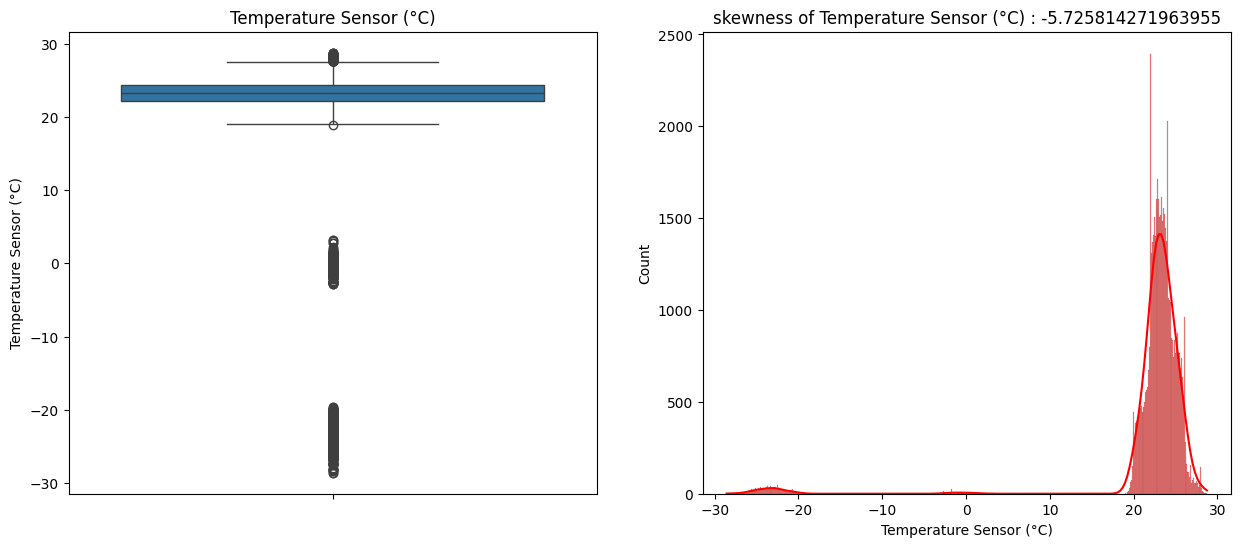

______________________________________________________________________________________________________________________________________________________


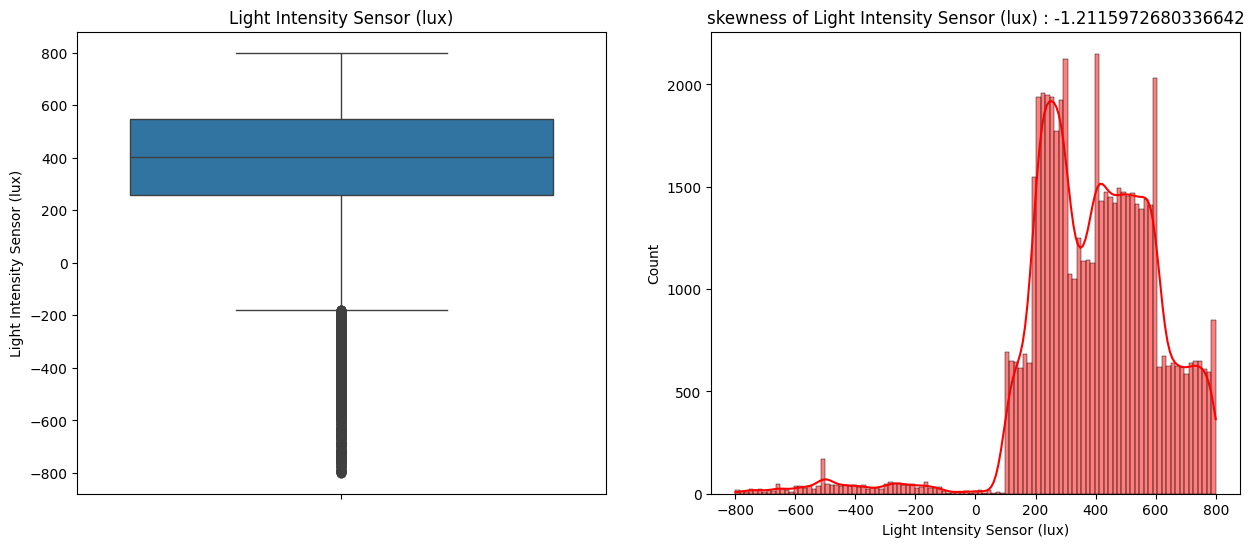

______________________________________________________________________________________________________________________________________________________


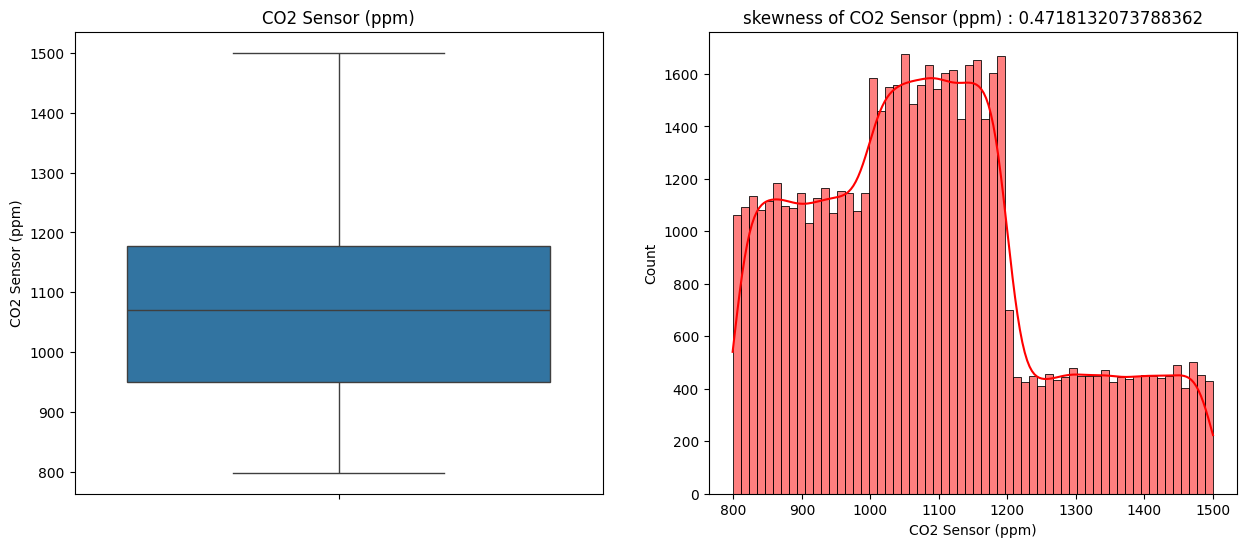

______________________________________________________________________________________________________________________________________________________


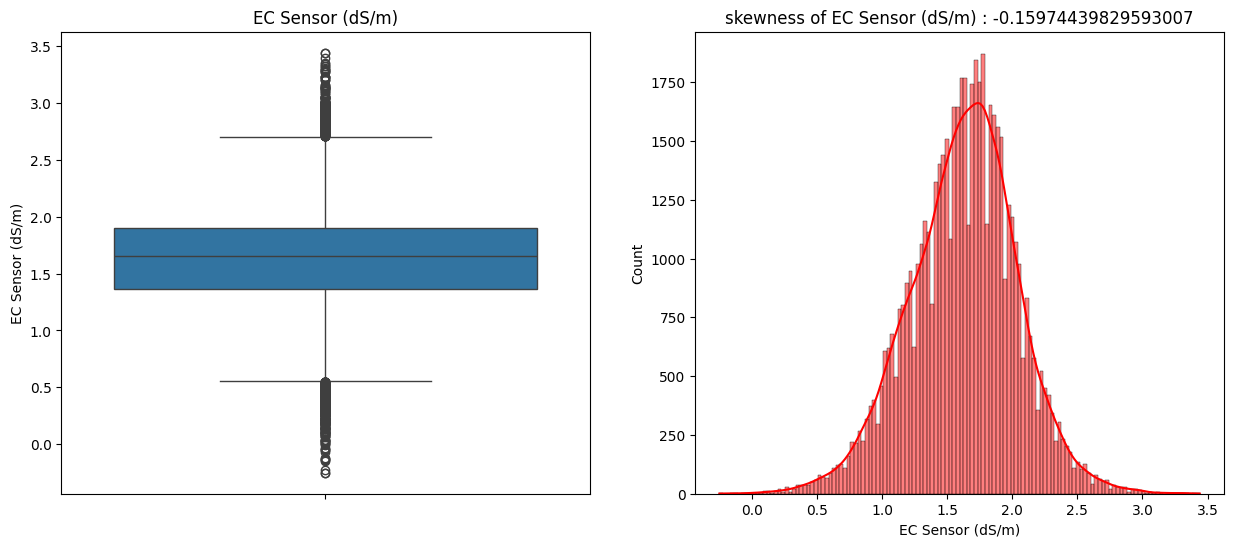

______________________________________________________________________________________________________________________________________________________


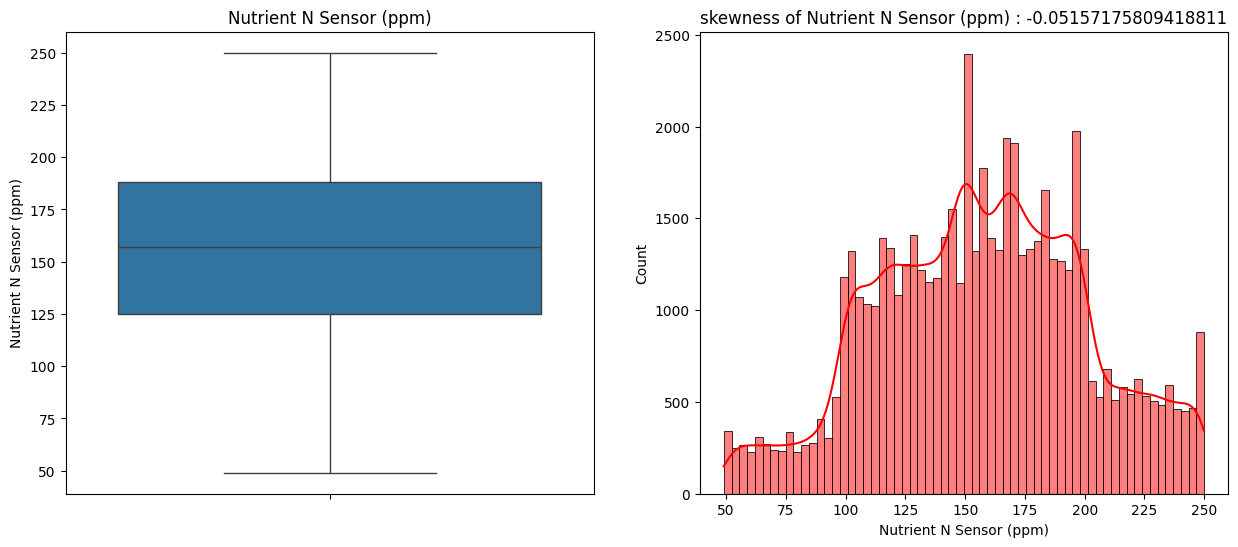

______________________________________________________________________________________________________________________________________________________


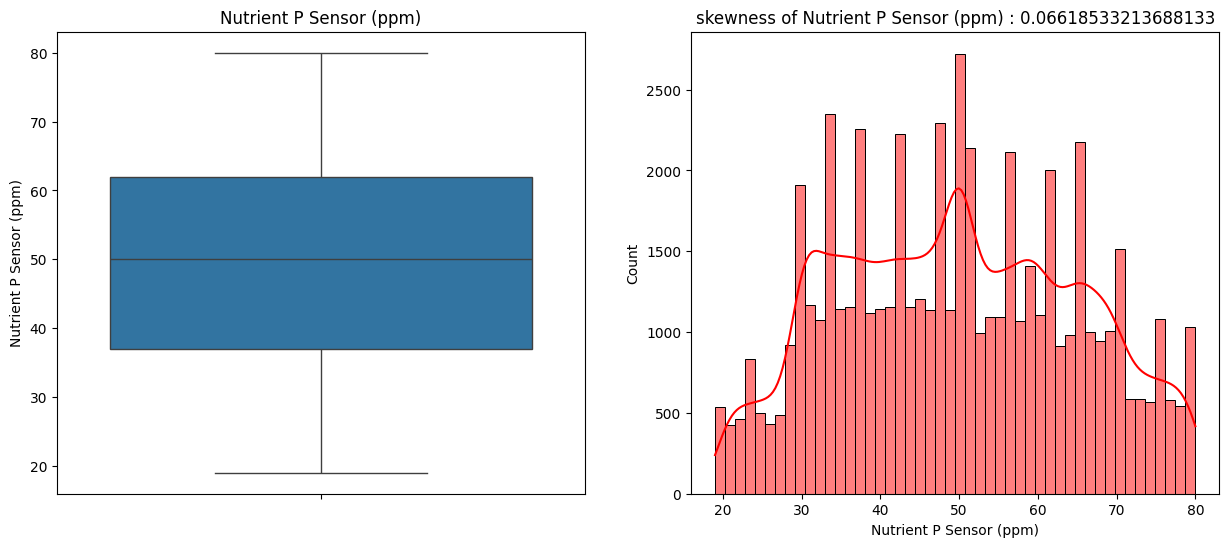

______________________________________________________________________________________________________________________________________________________


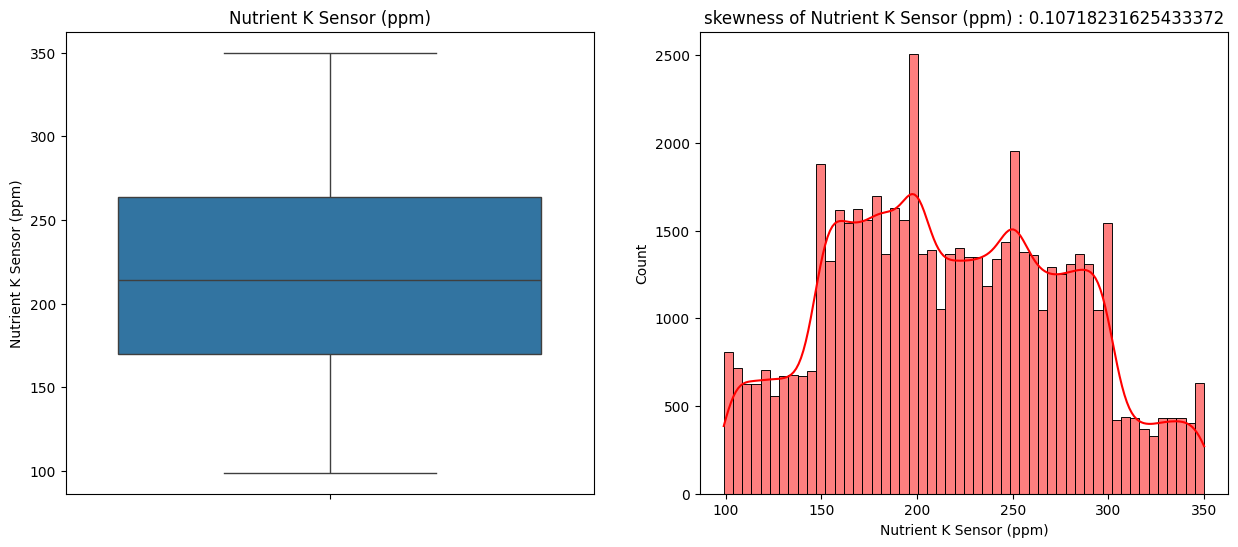

______________________________________________________________________________________________________________________________________________________


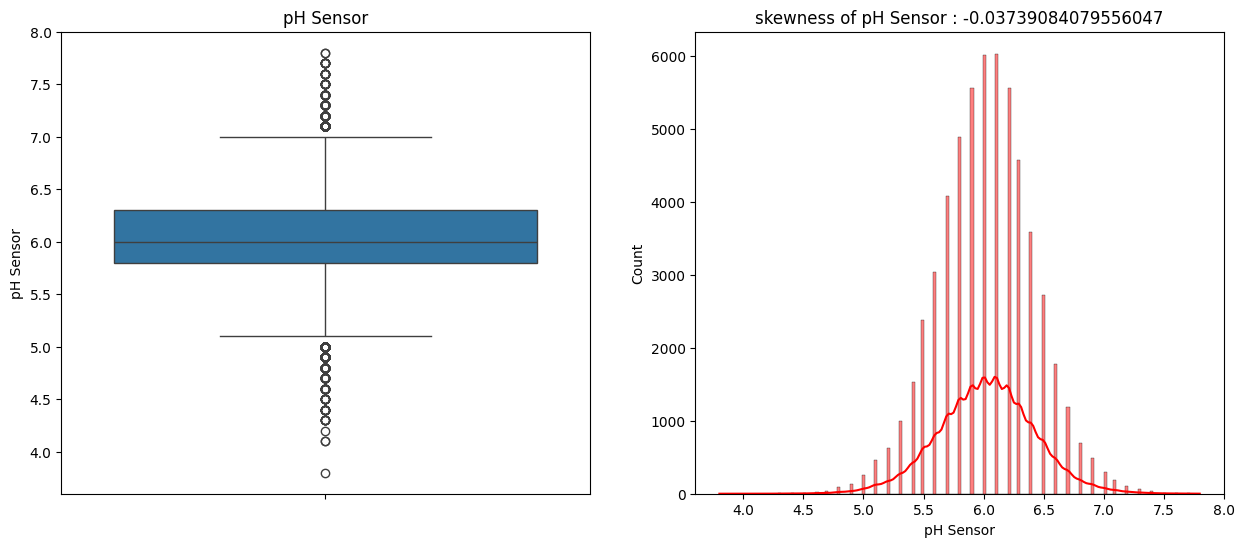

______________________________________________________________________________________________________________________________________________________


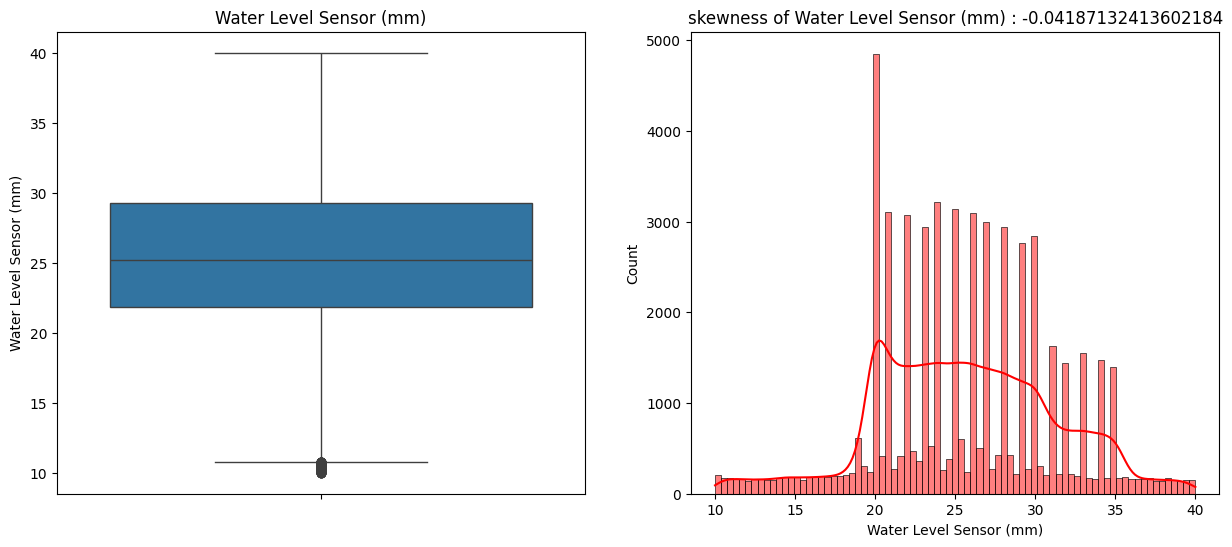

In [24]:
from scipy.stats import norm
for i in continuous_features:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.histplot(df[i], kde=True, color='red', edgecolor='black')
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*75)
  plt.show()

From the boxplots, we observe some outliers for temperature sensor, light intensity sensor, EC sensor, pH sensor, and water level sensor. Lets try removing these outliers first.  
  
We also noticed that features like temperature sensor (skewness<-5) and light intensity sensor (skewness<-1) are considered highly skewed to the right. Whereas, CO2 sensor is moderately skewed to the left as its skewness is approximately 0.5 while the rest of the features are approximately symmetrical, somewhat normally distributed. Lets see if transformation is needed after dropping outliers.    

Reference: https://anatomisebiostats.com/biostatistics-blog/transforming-skewed-data/

In [25]:
df.columns

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)',
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
       'O2 Sensor (ppm)', 'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)'],
      dtype='object')

In [27]:
colWithOutliers=['Temperature Sensor (°C)',
       'Light Intensity Sensor (lux)', 'EC Sensor (dS/m)', 'pH Sensor', 'Water Level Sensor (mm)']
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR outlier removal
for i in colWithOutliers:
    df = remove_outliers_iqr(df, i)

df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
5               Zone_C                Vine Crops  Fruiting Vegetables   
6               Zone_A              Leafy Greens           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
5    Maturity                    25.96                         675.0   
6    Maturity                    23.60                         514.0   

   CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
0             937.0              1.82                4   
2            1246.0              1.21                8   
3            1346.0              1.96                6   
5            1338.0              1.75                8   
6            1103.0              1.14                8   

   Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  \
0                    161.0                     64.0                    201.0   
2                    228.0                     79.0                    292.0   
3                    198.5                     53.0                    289.0   
5                    227.0                     53.0                    258.0   
6                    174.0                     62.0                    217.0   

   pH Sensor  Water Level Sensor (mm)  
0        6.1                28.150346  
2        6.4                26.000000  
3        6.6                28.500000  
5        6.2                23.092135  
6        5.5                35.000000

______________________________________________________________________________________________________________________________________________________


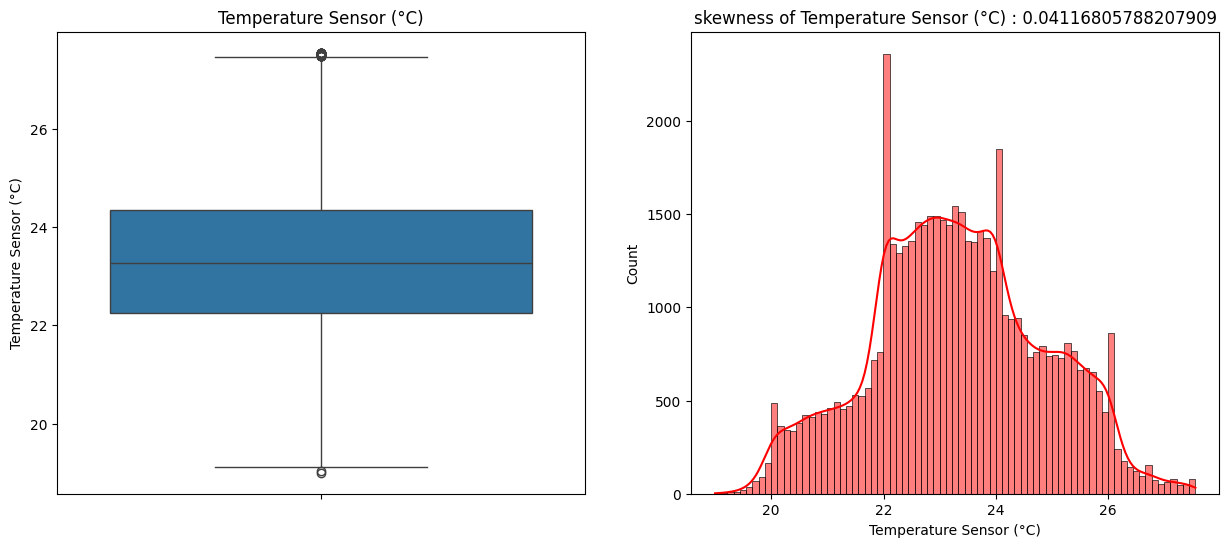

______________________________________________________________________________________________________________________________________________________


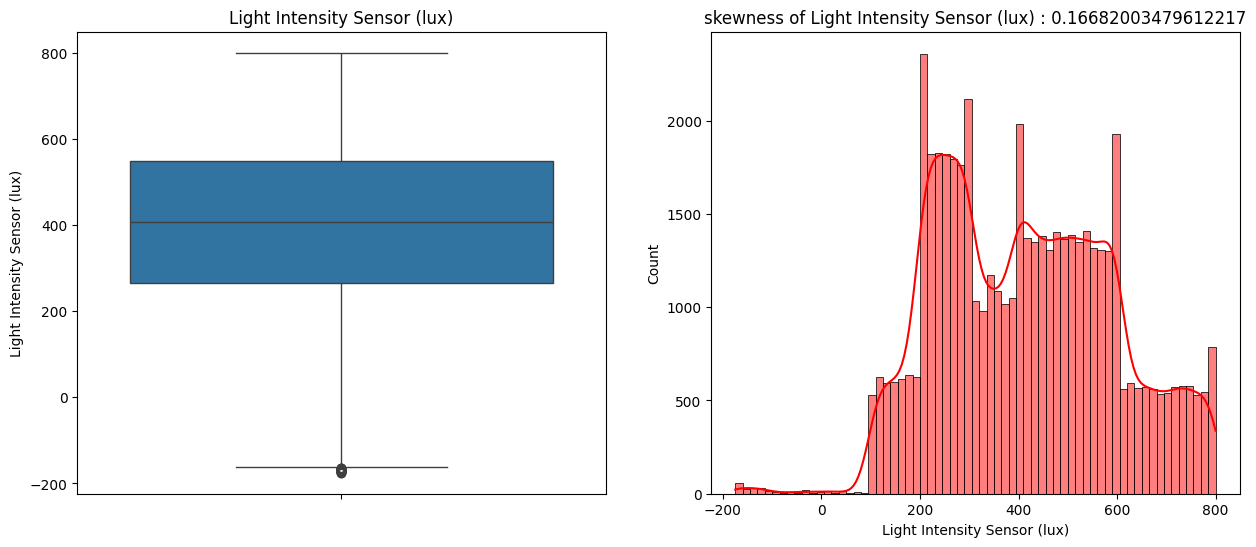

______________________________________________________________________________________________________________________________________________________


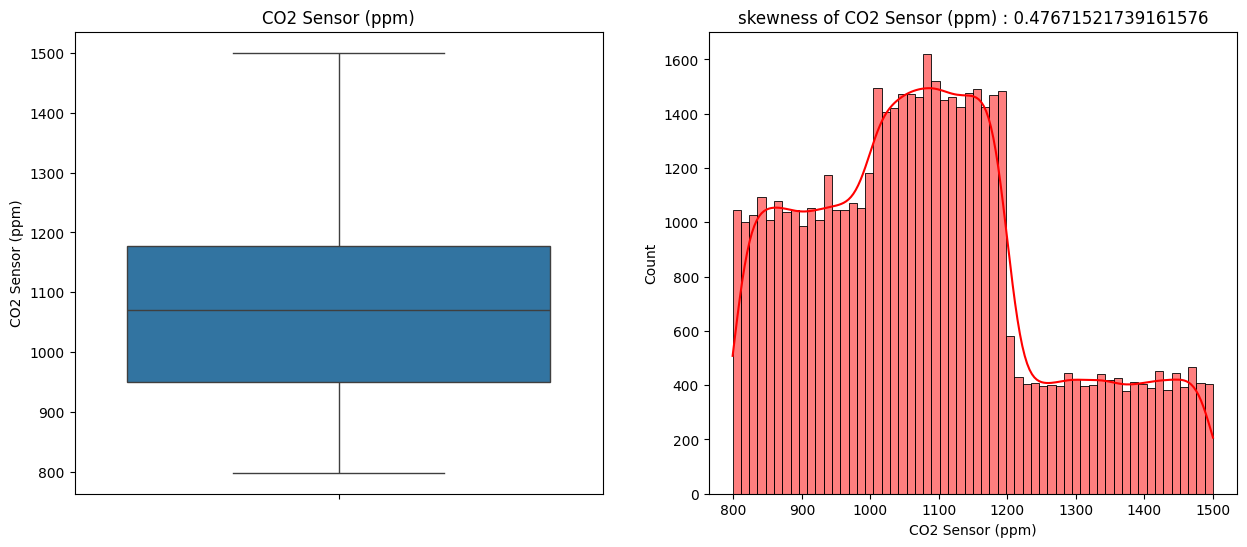

______________________________________________________________________________________________________________________________________________________


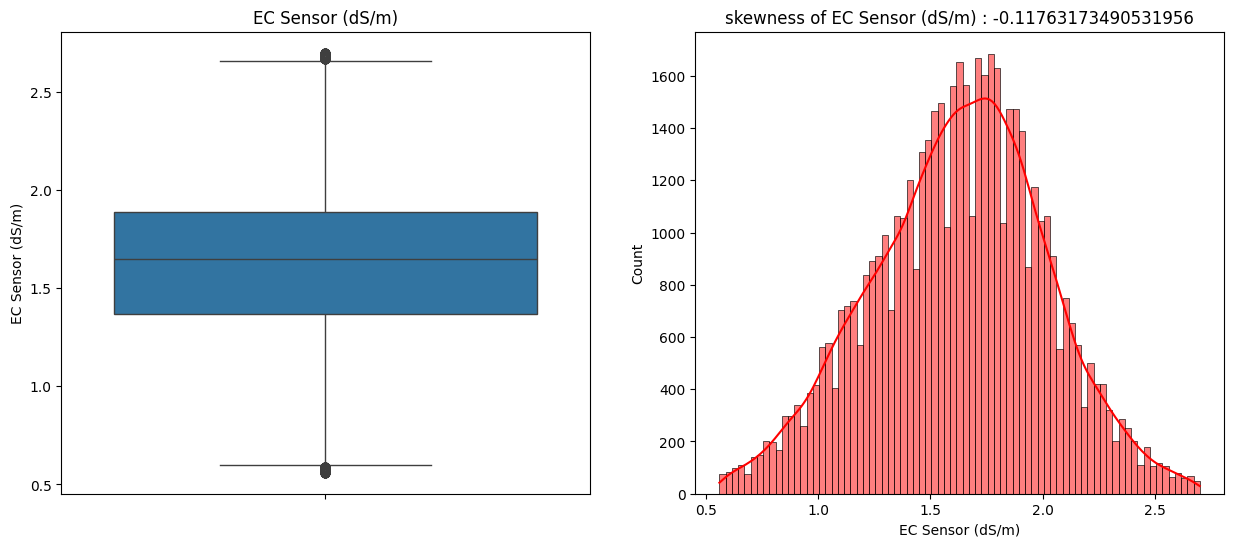

______________________________________________________________________________________________________________________________________________________


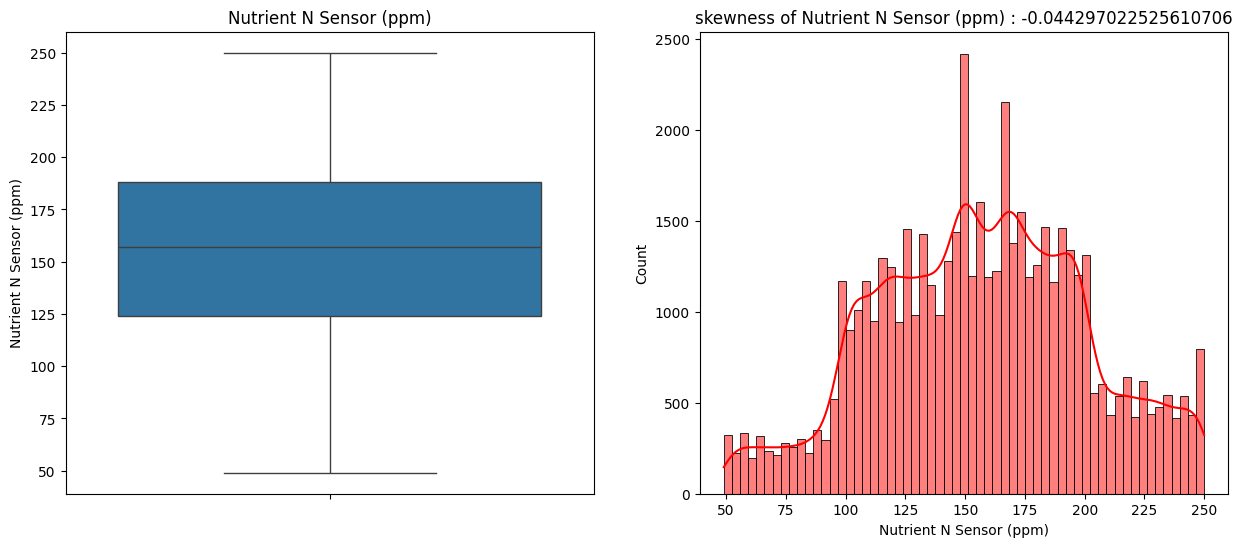

______________________________________________________________________________________________________________________________________________________


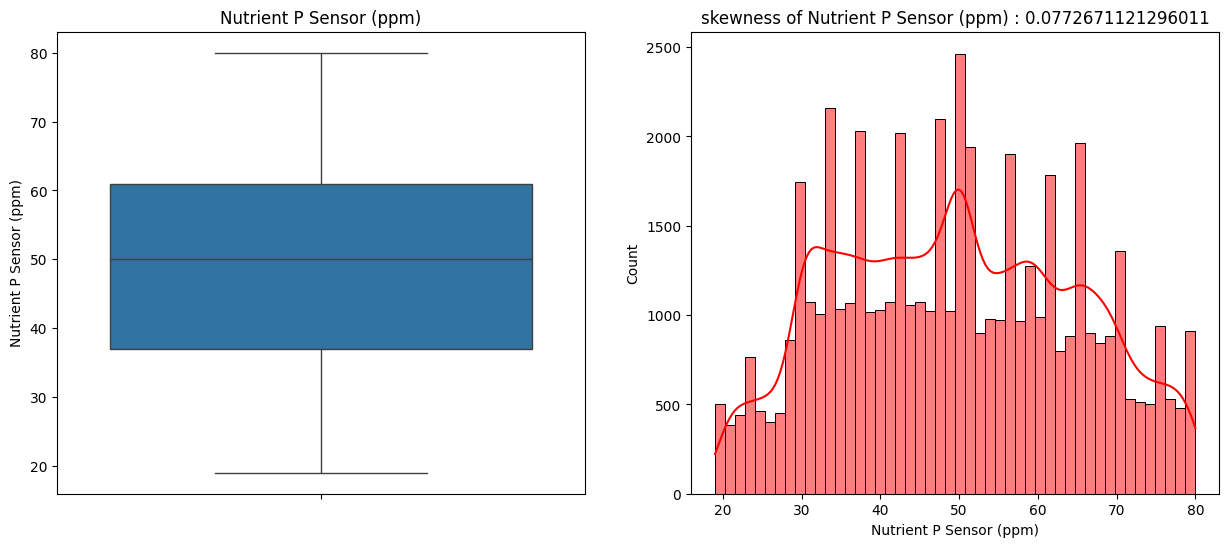

______________________________________________________________________________________________________________________________________________________


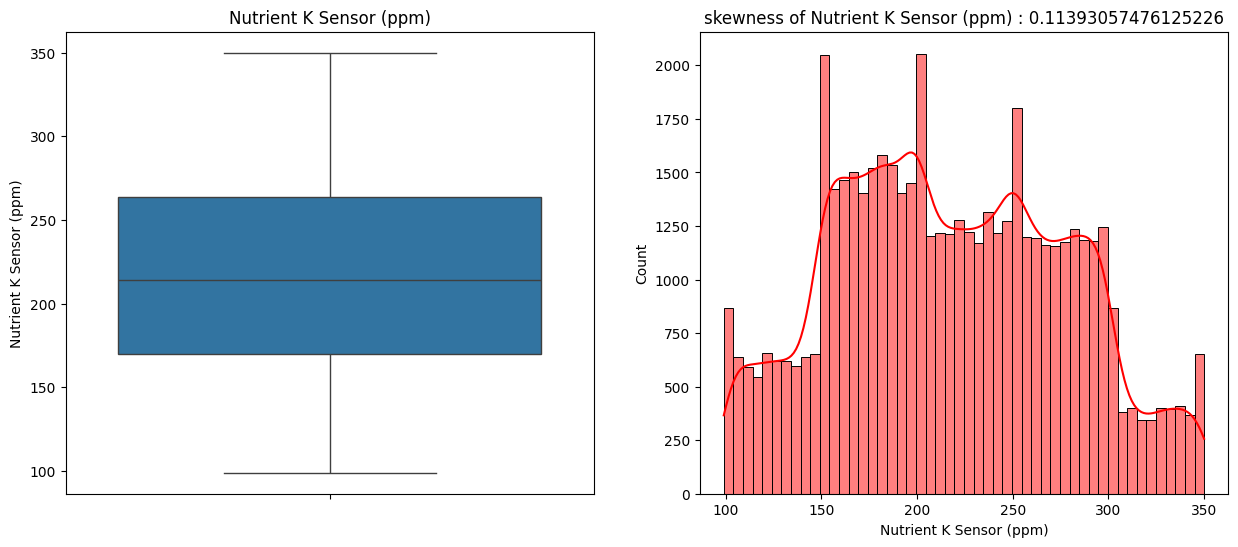

______________________________________________________________________________________________________________________________________________________


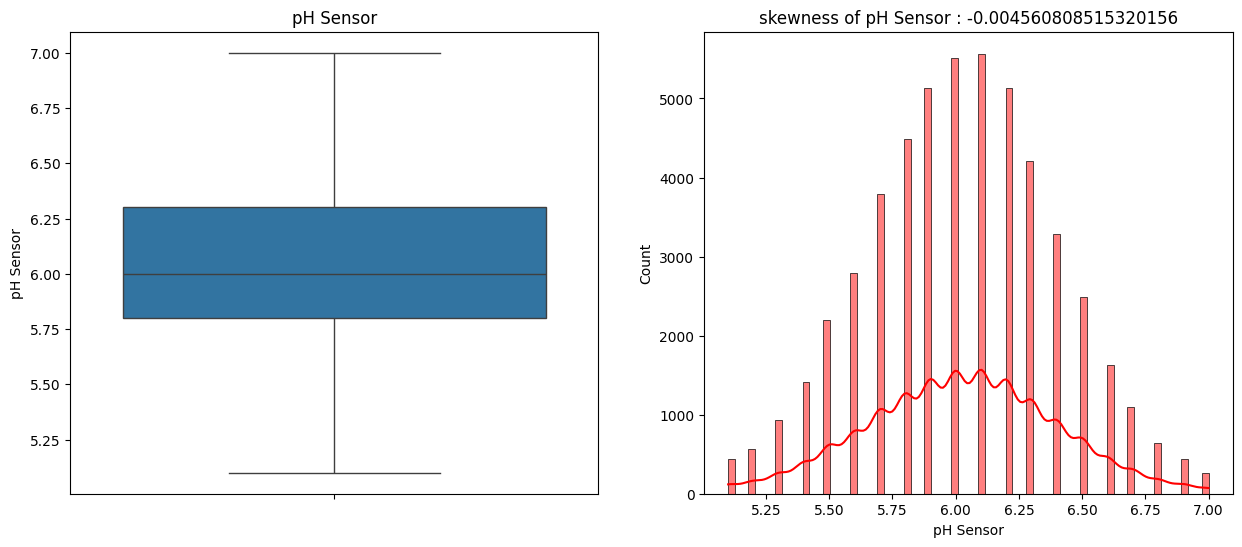

______________________________________________________________________________________________________________________________________________________


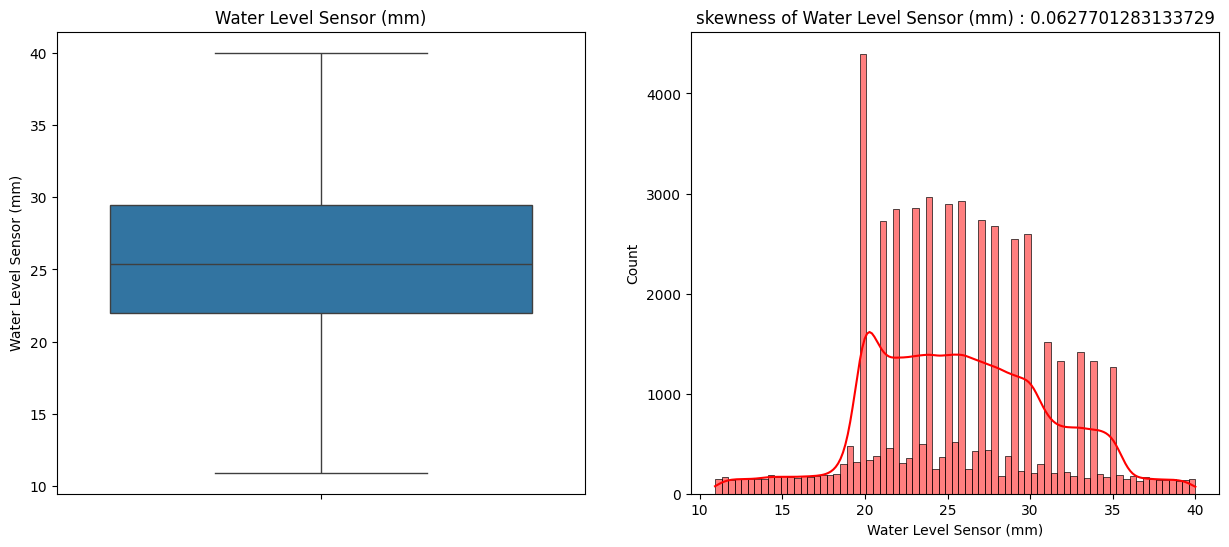

In [28]:

for i in continuous_features:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.histplot(df[i], kde=True, color='red', edgecolor='black')
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*75)
  plt.show()

The skewness of each data reduced significantly. However, we still observe relatively high positive skewness for CO2 Sensor so we will try to do a transformation of the this column.

In [29]:
# 2. Log Transformation
df['ln CO2 Sensor (ppm)'] = np.log(df['CO2 Sensor (ppm)'] + 1)

df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
5               Zone_C                Vine Crops  Fruiting Vegetables   
6               Zone_A              Leafy Greens           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
5    Maturity                    25.96                         675.0   
6    Maturity                    23.60                         514.0   

   CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
0             937.0              1.82                4   
2            1246.0              1.21                8   
3            1346.0              1.96                6   
5            1338.0              1.75                8   
6            1103.0              1.14                8   

   Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  \
0                    161.0                     64.0                    201.0   
2                    228.0                     79.0                    292.0   
3                    198.5                     53.0                    289.0   
5                    227.0                     53.0                    258.0   
6                    174.0                     62.0                    217.0   

   pH Sensor  Water Level Sensor (mm)  ln CO2 Sensor (ppm)  
0        6.1                28.150346             6.843750  
2        6.4                26.000000             7.128496  
3        6.6                28.500000             7.205635  
5        6.2                23.092135             7.199678  
6        5.5                35.000000             7.006695

______________________________________________________________________________________________________________________________________________________


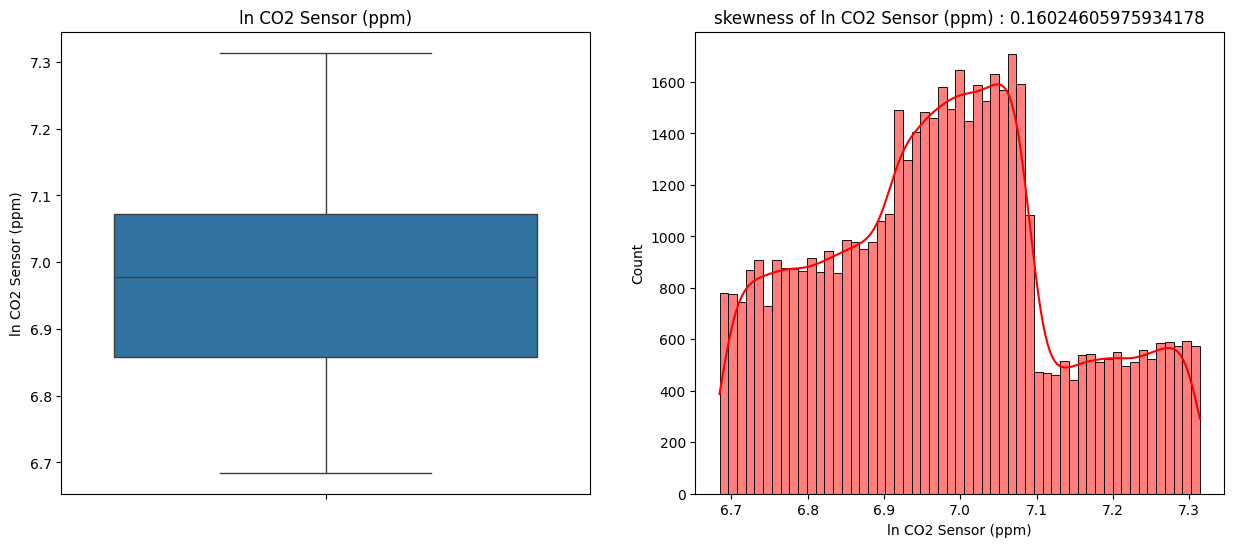

In [30]:
after_trnf=['ln CO2 Sensor (ppm)']

for i in after_trnf:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.histplot(df[i], kde=True, color='red', edgecolor='black')
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*75)
  plt.show()

After transformation, we observe the skewness for ln CO2 Sensor (ppm) reduces. Hence, we will stick to having this column.  

In [36]:
df.drop(columns=['CO2 Sensor (ppm)'],inplace=True)
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
5               Zone_C                Vine Crops  Fruiting Vegetables   
6               Zone_A              Leafy Greens           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
5    Maturity                    25.96                         675.0   
6    Maturity                    23.60                         514.0   

   EC Sensor (dS/m)  O2 Sensor (ppm)  Nutrient N Sensor (ppm)  \
0              1.82                4                    161.0   
2              1.21                8                    228.0   
3              1.96                6                    198.5   
5              1.75                8                    227.0   
6              1.14                8                    174.0   

   Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  pH Sensor  \
0                     64.0                    201.0        6.1   
2                     79.0                    292.0        6.4   
3                     53.0                    289.0        6.6   
5                     53.0                    258.0        6.2   
6                     62.0                    217.0        5.5   

   Water Level Sensor (mm)  ln CO2 Sensor (ppm)  \
0                28.150346             6.843750   
2                26.000000             7.128496   
3                28.500000             7.205635   
5                23.092135             7.199678   
6                35.000000             7.006695   

                 Plant_Type_Stage  
0             Vine Crops-Maturity  
2                  Herbs-Maturity  
3  Fruiting Vegetables-Vegetative  
5    Fruiting Vegetables-Maturity  
6             Vine Crops-Maturity

#### Univariate Analysis of categorical_features

Let us first categorise  the  combined  "Plant  Type-Stage" and include this in our categorical data.

In [37]:
df['Plant_Type_Stage'] = df['Plant Type'] + "-" + df['Plant Stage']
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
5               Zone_C                Vine Crops  Fruiting Vegetables   
6               Zone_A              Leafy Greens           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
5    Maturity                    25.96                         675.0   
6    Maturity                    23.60                         514.0   

   EC Sensor (dS/m)  O2 Sensor (ppm)  Nutrient N Sensor (ppm)  \
0              1.82                4                    161.0   
2              1.21                8                    228.0   
3              1.96                6                    198.5   
5              1.75                8                    227.0   
6              1.14                8                    174.0   

   Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  pH Sensor  \
0                     64.0                    201.0        6.1   
2                     79.0                    292.0        6.4   
3                     53.0                    289.0        6.6   
5                     53.0                    258.0        6.2   
6                     62.0                    217.0        5.5   

   Water Level Sensor (mm)  ln CO2 Sensor (ppm)  \
0                28.150346             6.843750   
2                26.000000             7.128496   
3                28.500000             7.205635   
5                23.092135             7.199678   
6                35.000000             7.006695   

                 Plant_Type_Stage  
0             Vine Crops-Maturity  
2                  Herbs-Maturity  
3  Fruiting Vegetables-Vegetative  
5    Fruiting Vegetables-Maturity  
6             Vine Crops-Maturity

In [38]:
# check whether the data is balanced
print(df['Plant_Type_Stage'].value_counts())
# seems balanced as value counts lie approximately within the range of 3847 to 4582.

Plant_Type_Stage
Fruiting Vegetables-Seedling      4582
Leafy Greens-Seedling             4552
Herbs-Seedling                    4419
Herbs-Maturity                    4415
Fruiting Vegetables-Vegetative    4408
Leafy Greens-Maturity             4404
Herbs-Vegetative                  4374
Vine Crops-Vegetative             4296
Leafy Greens-Vegetative           4272
Vine Crops-Seedling               4256
Vine Crops-Maturity               4191
Fruiting Vegetables-Maturity      3847
Name: count, dtype: int64


In [39]:
# check if there is any null values
print(df['Plant_Type_Stage'].isna().value_counts())

Plant_Type_Stage
False    52016
Name: count, dtype: int64


In [34]:
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
5               Zone_C                Vine Crops  Fruiting Vegetables   
6               Zone_A              Leafy Greens           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
0    Maturity                    23.34                         454.0   
2    Maturity                    23.84                         562.0   
3  Vegetative                    22.61                         651.0   
5    Maturity                    25.96                         675.0   
6    Maturity                    23.60                         514.0   

   CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
0             937.0              1.82                4   
2            1246.0              1.21                8   
3            1346.0              1.96                6   
5            1338.0              1.75                8   
6            1103.0              1.14                8   

   Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  Nutrient K Sensor (ppm)  \
0                    161.0                     64.0                    201.0   
2                    228.0                     79.0                    292.0   
3                    198.5                     53.0                    289.0   
5                    227.0                     53.0                    258.0   
6                    174.0                     62.0                    217.0   

   pH Sensor  Water Level Sensor (mm)  ln CO2 Sensor (ppm)  \
0        6.1                28.150346             6.843750   
2        6.4                26.000000             7.128496   
3        6.6                28.500000             7.205635   
5        6.2                23.092135             7.199678   
6        5.5                35.000000             7.006695   

                 Plant_Type_Stage  
0             Vine Crops-Maturity  
2                  Herbs-Maturity  
3  Fruiting Vegetables-Vegetative  
5    Fruiting Vegetables-Maturity  
6             Vine Crops-Maturity

In [40]:
df.columns

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)',
       'Light Intensity Sensor (lux)', 'EC Sensor (dS/m)', 'O2 Sensor (ppm)',
       'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)',
       'ln CO2 Sensor (ppm)', 'Plant_Type_Stage'],
      dtype='object')

In [41]:
categorical_features = ['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage','O2 Sensor (ppm)','Plant_Type_Stage']
categorical_features

['System Location Code',
 'Previous Cycle Plant Type',
 'Plant Type',
 'Plant Stage',
 'O2 Sensor (ppm)',
 'Plant_Type_Stage']

In [42]:
# Defining r to autofit the number and size of plots
r = int(len(categorical_features)/3 +1)

In [43]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

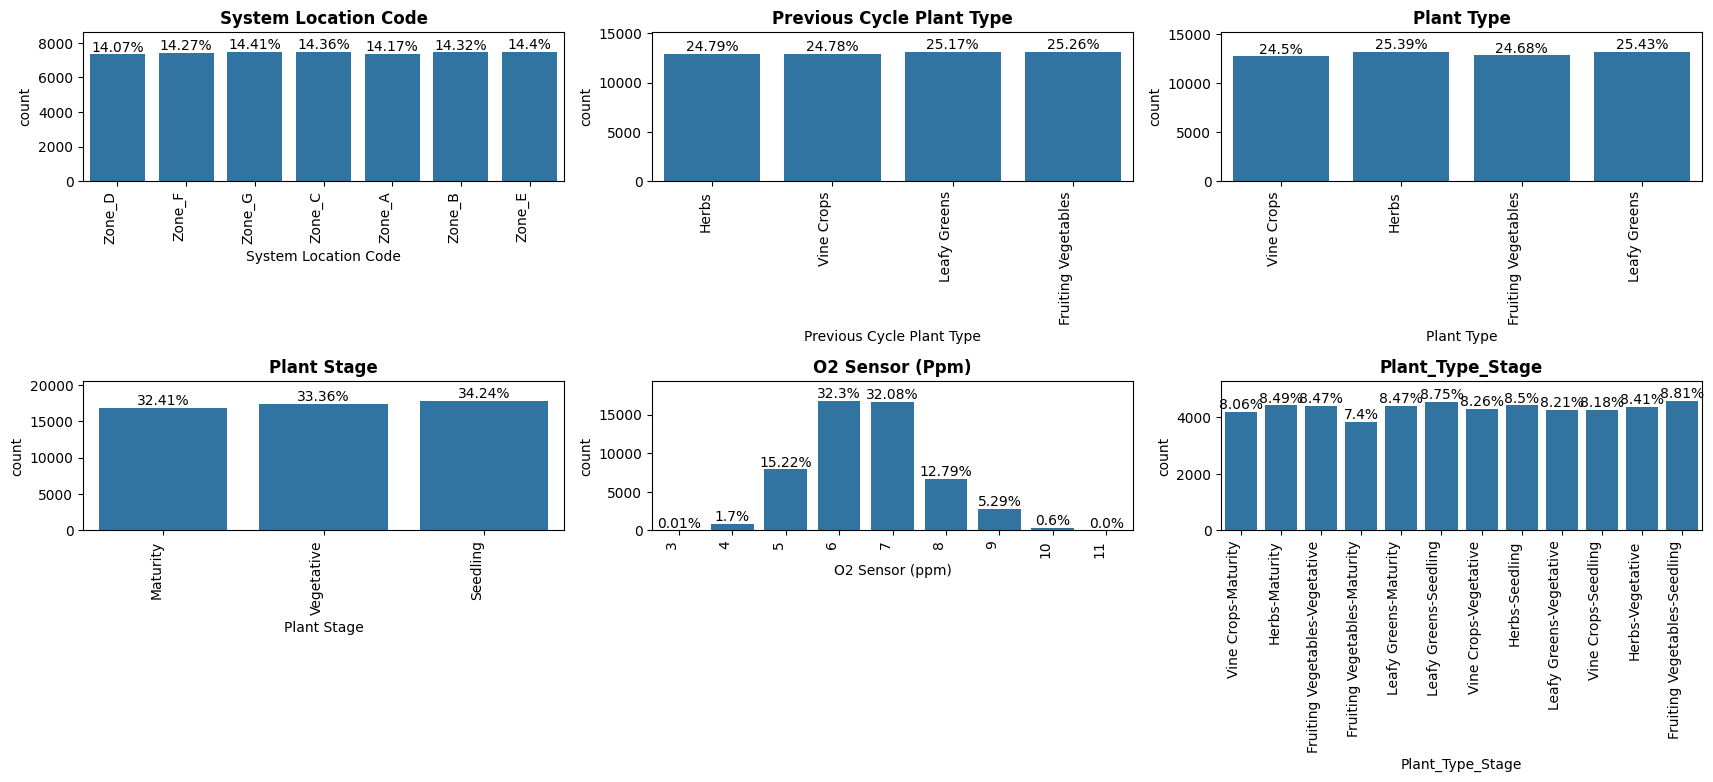

In [48]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(categorical_features):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)
    plt.xticks(rotation=90, ha='right')  

**Observations**  
- All categorical features except for O2 Sensor (Ppm) have balanced counts for each type. 
- Since most categories are balanced, my models won't be biased towards a majority class.
- Since O2 sensor data is unbalanced, further analysis on its distribution across different Plant Type-Stage combinations is needed.

#### Bivariate Analysis

**Question 1: What are the changes in the number of plant type?**

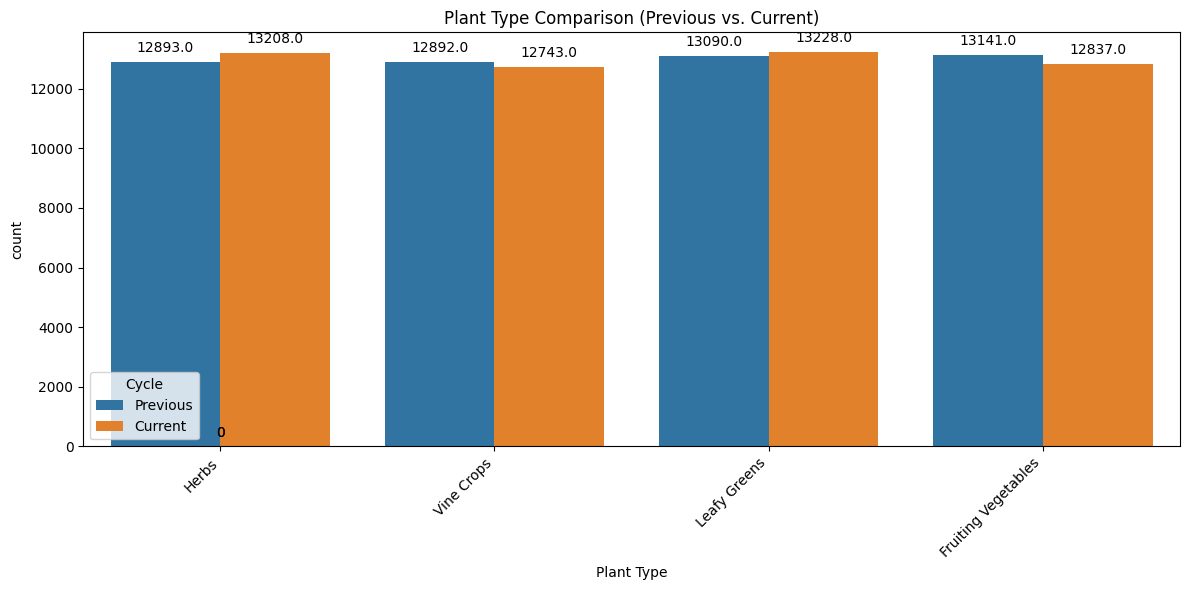

In [50]:
def plot_plant_type_comparison(df):
    previous_cycle = df[['Previous Cycle Plant Type']].copy()
    previous_cycle['Cycle'] = 'Previous'
    previous_cycle.rename(columns={'Previous Cycle Plant Type': 'Plant Type'}, inplace=True)

    current_cycle = df[['Plant Type']].copy()
    current_cycle['Cycle'] = 'Current'

    combined_df = pd.concat([previous_cycle, current_cycle])

    # Create the countplot
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=combined_df, x='Plant Type', hue='Cycle')
    ax.set_title('Plant Type Comparison (Previous vs. Current)')
    plt.xticks(rotation=45, ha='right')  # Rotates labels globally in the subplot

    # Annotate with counts (optional)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

plot_plant_type_comparison(df)

We can see the counts for Herbs and Leafy Greens increase while the counts for Vine Crops and Fruiting Vegetables decrease.

**Question 2: Which plant stage requires the highest amount of O2?**

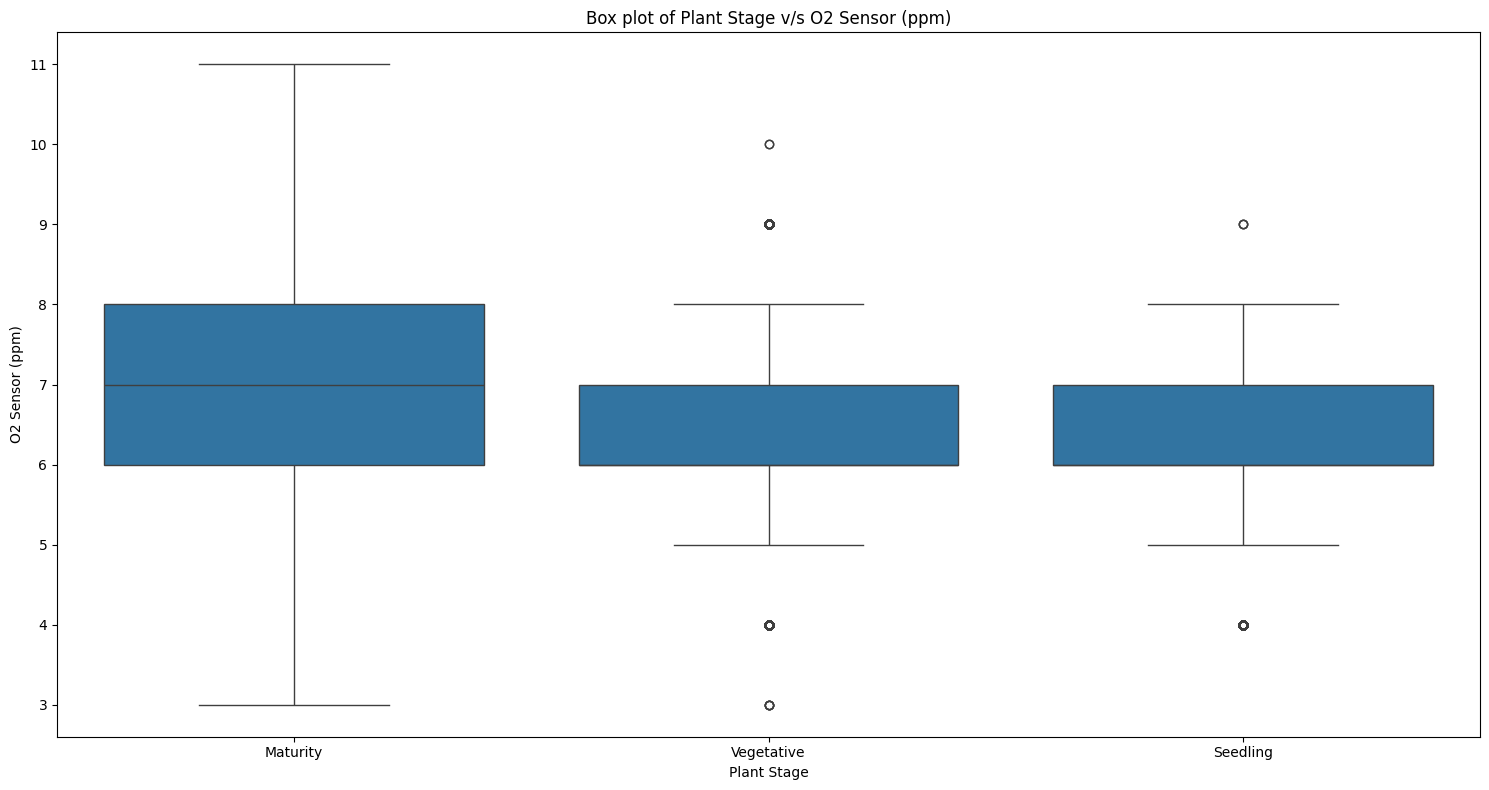

In [51]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=df['Plant Stage'], y=df['O2 Sensor (ppm)'])
ax.set_title('Box plot of Plant Stage v/s O2 Sensor (ppm)')
plt.tight_layout()
plt.show()

Maturity requires the highest amount of oxygen as seen in the higher median. Agrifarm need to supply more oxygen during the maturity stage for a better plant growth whereas, the seedling and vegetative will require less but similar amount of oxygen. 

**Question 3: WHich plant type-stage requires the highest amount of O2?**

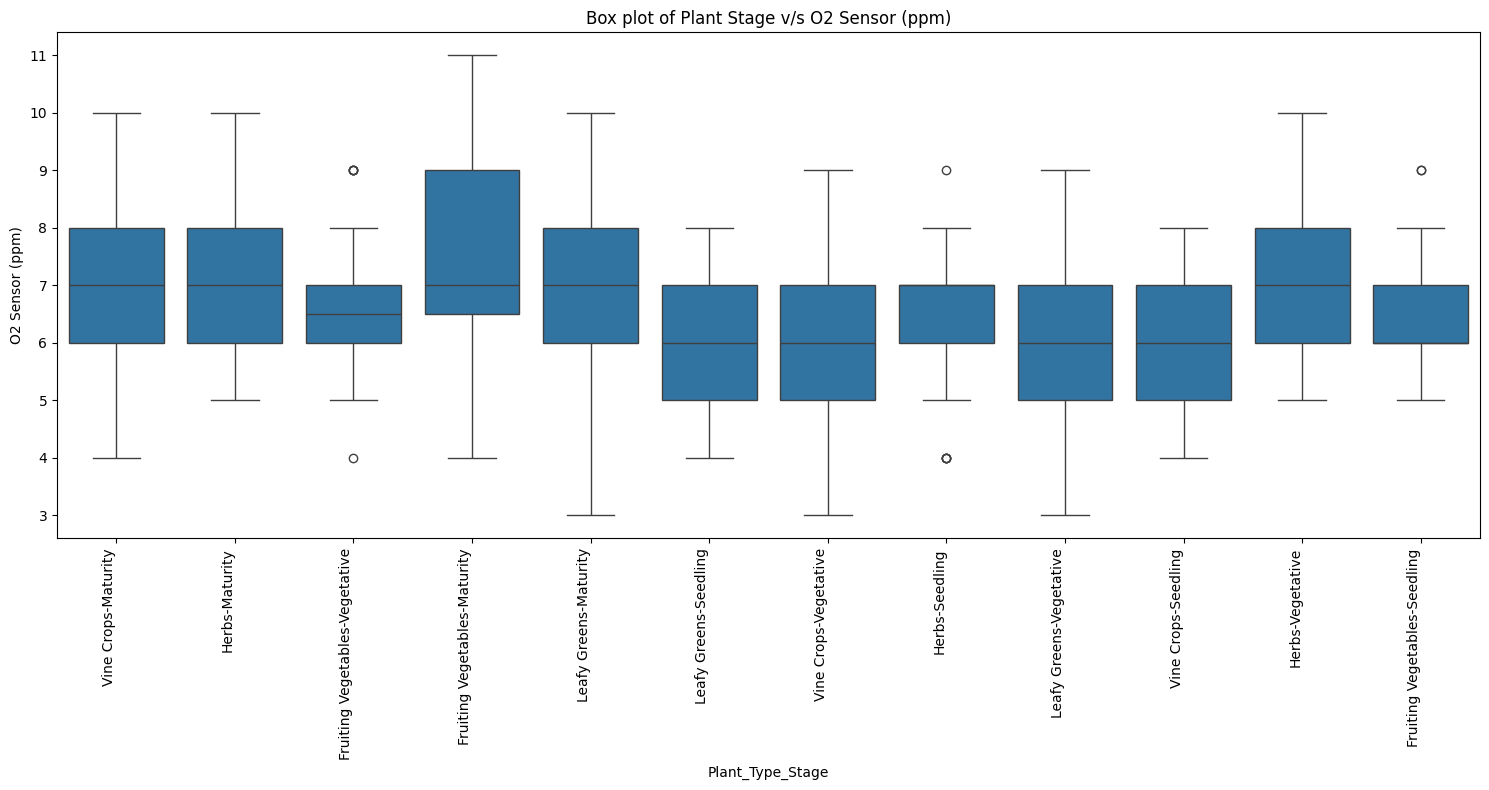

In [55]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=df['Plant_Type_Stage'], y=df['O2 Sensor (ppm)'])
ax.set_title('Box plot of Plant Stage v/s O2 Sensor (ppm)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

- 'Vine Crops-Maturity', 'Herbs-Maturity',  'Fruiting Vegetables-Vegetative', 'Fruiting Vegetables-Maturity', 'Leafy Greens-Maturity', 'Herbs-Vegetative' require roughly similar and higher amount of O2.
-  Whereas, the rest of the variables 'Leafy Greens-Seedling', 'Vine Crops-Vegetative', 'Herbs-Seedling', 'Leafy Greens-Vegetative', 'Vine Crops-Seedling', 'Herbs-Vegetative', 'Fruiting Vegetables-Seedling' require rather low amount of O2.

Let's do a ANOVA test for the above two observations to understand if there are significant differences between their means.  
H0: All group means are equal  
H1: At least one group mean is different

In [59]:
from scipy.stats import f_oneway

# Filter the data for each group
vine_crops_maturity = df[df['Plant_Type_Stage'] == 'Vine Crops-Maturity']['O2 Sensor (ppm)']
herbs_maturity = df[df['Plant_Type_Stage'] == 'Herbs-Maturity']['O2 Sensor (ppm)']
fruiting_veg_vegetative = df[df['Plant_Type_Stage'] == 'Fruiting Vegetables-Vegetative']['O2 Sensor (ppm)']
fruiting_veg_maturity = df[df['Plant_Type_Stage'] == 'Fruiting Vegetables-Maturity']['O2 Sensor (ppm)']
leafy_greens_maturity = df[df['Plant_Type_Stage'] == 'Leafy Greens-Maturity']['O2 Sensor (ppm)']
herbs_vegetative = df[df['Plant_Type_Stage'] == 'Herbs-Vegetative']['O2 Sensor (ppm)']

# Conduct the one-way ANOVA
F_statistic, p_value = f_oneway(
    vine_crops_maturity, 
    herbs_maturity, 
    fruiting_veg_vegetative, 
    fruiting_veg_maturity, 
    leafy_greens_maturity, 
    herbs_vegetative
)

print(f"F-statistic: {F_statistic}, p-value: {p_value}")

F-statistic: 290.02084714217716, p-value: 6.767836029241222e-303


The large F-Statistics means that the variability between the means of my groups is much greater than the variability within the groups, suggesting a strong evidence that at least opne group mean is different from the others. Since the p-value<0.05, we reject the null hypothesis, indicating that there is a significant difference in the means of the groups.

In [61]:
from scipy.stats import f_oneway

# Filter the data for each group based on `Plant_Type_Stage` column
leafy_greens_seedling = df[df['Plant_Type_Stage'] == 'Leafy Greens-Seedling']['O2 Sensor (ppm)']
vine_crops_vegetative = df[df['Plant_Type_Stage'] == 'Vine Crops-Vegetative']['O2 Sensor (ppm)']
herbs_seedling = df[df['Plant_Type_Stage'] == 'Herbs-Seedling']['O2 Sensor (ppm)']
leafy_greens_vegetative = df[df['Plant_Type_Stage'] == 'Leafy Greens-Vegetative']['O2 Sensor (ppm)']
vine_crops_seedling = df[df['Plant_Type_Stage'] == 'Vine Crops-Seedling']['O2 Sensor (ppm)']
herbs_vegetative = df[df['Plant_Type_Stage'] == 'Herbs-Vegetative']['O2 Sensor (ppm)']
fruiting_vegetables_seedling = df[df['Plant_Type_Stage'] == 'Fruiting Vegetables-Seedling']['O2 Sensor (ppm)']

# Conduct the one-way ANOVA
F_statistic, p_value = f_oneway(
    leafy_greens_seedling,
    vine_crops_vegetative,
    herbs_seedling,
    leafy_greens_vegetative,
    vine_crops_seedling,
    herbs_vegetative,
    fruiting_vegetables_seedling
)

# Print the results
print(f"F-statistic: {F_statistic}, p-value: {p_value}")

F-statistic: 863.4293116082946, p-value: 0.0


The large F-Statistics means that the variability between the means of my groups is much greater than the variability within the groups, suggesting a strong evidence that at least opne group mean is different from the others. Since the p-value<0.05, we reject the null hypothesis, indicating that there is a significant difference in the means of the groups.

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
  Fruiting Vegetables-Maturity   Fruiting Vegetables-Seedling  -0.9956    0.0 -1.0695 -0.9218   True
  Fruiting Vegetables-Maturity Fruiting Vegetables-Vegetative  -0.9842    0.0 -1.0587 -0.9097   True
  Fruiting Vegetables-Maturity                 Herbs-Maturity  -0.5032    0.0 -0.5777 -0.4287   True
  Fruiting Vegetables-Maturity                 Herbs-Seedling   -0.968    0.0 -1.0425 -0.8936   True
  Fruiting Vegetables-Maturity               Herbs-Vegetative  -0.4837    0.0 -0.5583 -0.4091   True
  Fruiting Vegetables-Maturity          Leafy Greens-Maturity  -0.4781    0.0 -0.5526 -0.4035   True
  Fruiting Vegetables-Maturity          Leafy Greens-Seedling   -1.497    0.0  -1.571 -1.42

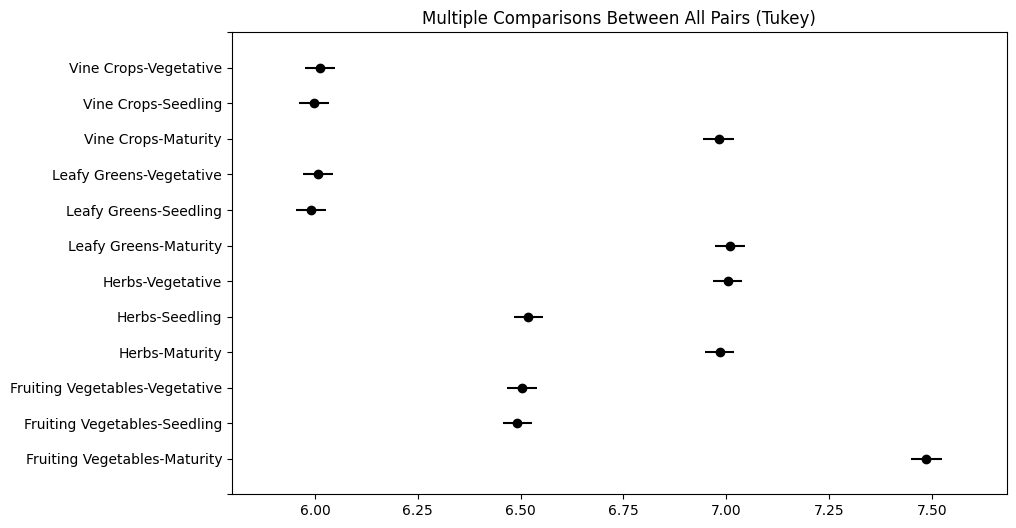

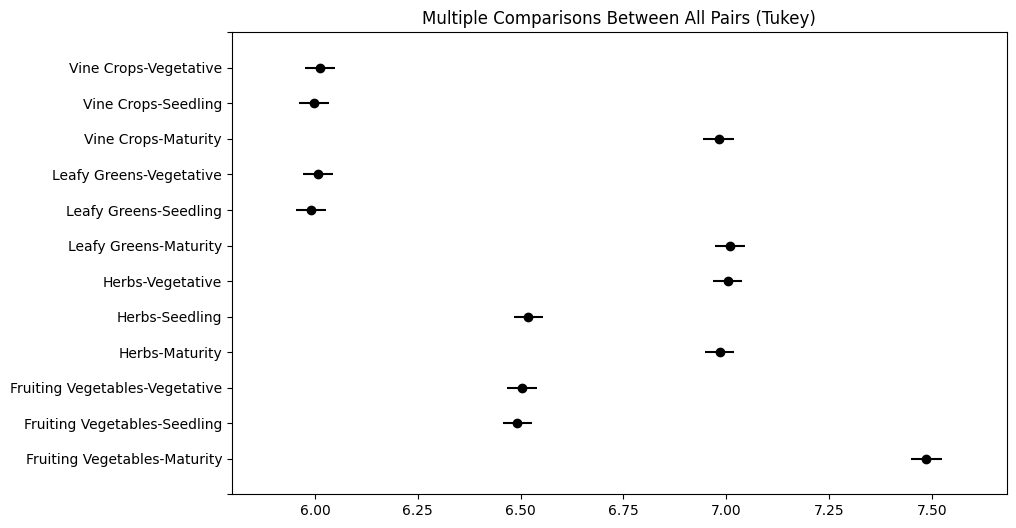

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(
    endog=df['O2 Sensor (ppm)'],          # The numeric data to test
    groups=df['Plant_Type_Stage'],       # The groups (categories)
    alpha=0.05                           # Significance level (5%)
)

# Print the results
print(tukey_result)

# To visualize the results
tukey_result.plot_simultaneous()


From Tukey's HSD, we observe that on average, the amount of oxygen required will be similar for 
- Fruiting Vegetables-Seedling and Fruiting Vegetables-Vegetative
- Fruiting Vegetables-Seedling         and        Herbs-Seedling
- Fruiting Vegetables-Vegetative      and           Herbs-Seedling
- Herbs-Maturity      and         Herbs-Vegetative
- Herbs-Maturity    and      Leafy Greens-Maturity
- Herbs-Maturity     and       Vine Crops-Maturity
- Herbs-Vegetative     and     Leafy Greens-Maturity
- Herbs-Vegetative   and         Vine Crops-Maturity
- Leafy Greens-Maturity    and    Leafy Greens-Vegetative
- Leafy Greens-Seedling    and    Leafy Greens-Vegetative
- Leafy Greens-Seedling      and      Vine Crops-Seedling
- Leafy Greens-Seedling     and     Vine Crops-Vegetative
- Vine Crops-Seedling   and       Vine Crops-Vegetative

**Question 4: Temperature of each plant type-stage?**

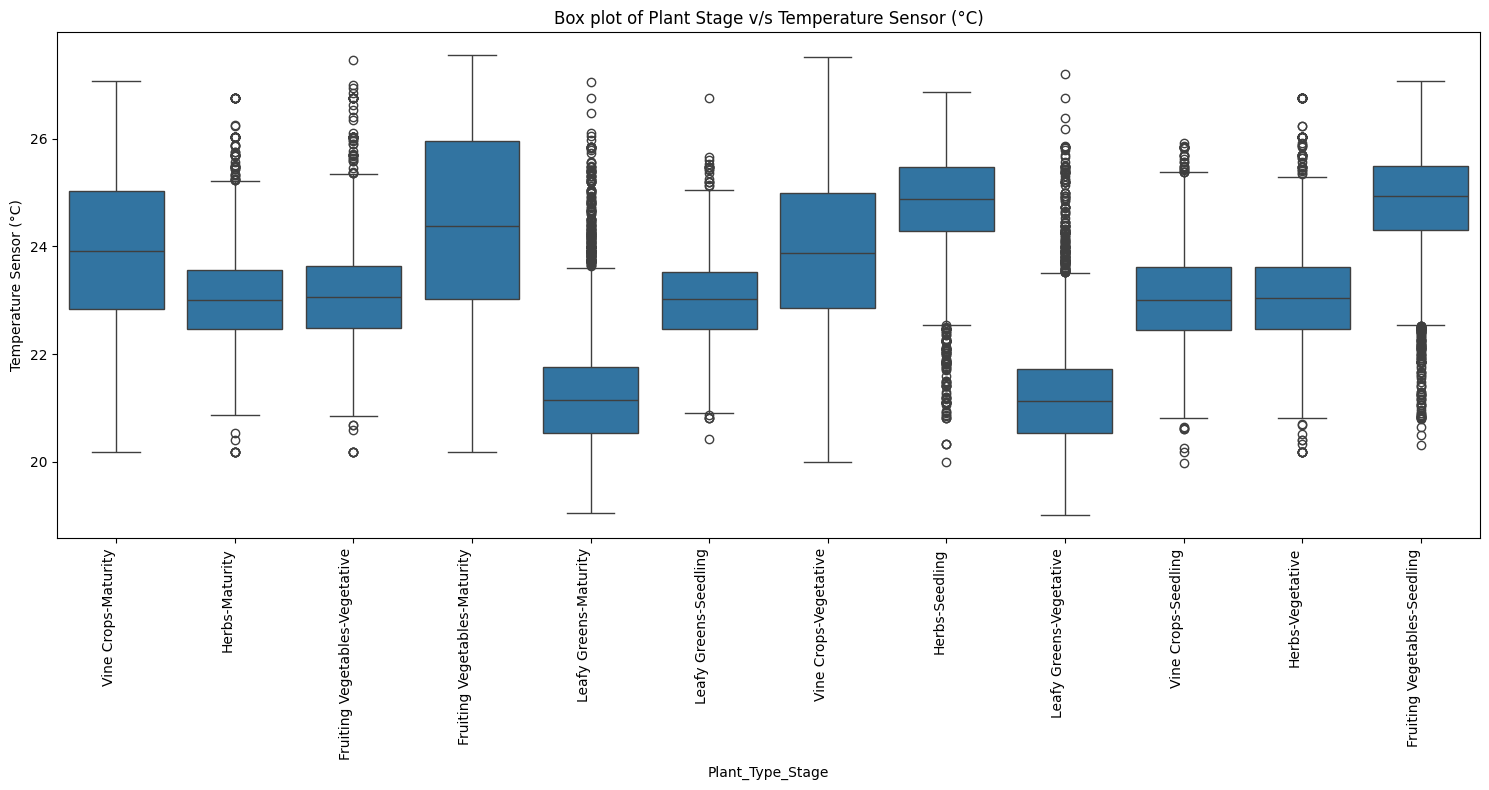

In [79]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=df['Plant_Type_Stage'], y=df['Temperature Sensor (°C)'])
ax.set_title('Box plot of Plant Stage v/s Temperature Sensor (°C)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

From the boxplots, we can see that the following groups share similar median temperature:  
- 'Vine Crops-Maturity', 'Fruiting Vegetables-Maturity', 'Vine Crops-Vegetative'
- 'Herbs-Seedling', 'Fruiting Vegetables-Seedling'
- 'Herbs-Maturity', 'Fruiting Vegetables-Vegetative', 'Leafy Greens-Seedling', 'Vine Crops-Seedling', 'Herbs-Vegetative'
- 'Leafy Greens-Maturity', 'Leafy Greens-Vegetative'

#### Multivariate Analysis

**1. Correlation Heatmap**  
We will explore how the sensor data affects the temperature.

In [70]:
df.dtypes

System Location Code             object
Previous Cycle Plant Type        object
Plant Type                       object
Plant Stage                      object
Temperature Sensor (°C)         float64
Light Intensity Sensor (lux)    float64
EC Sensor (dS/m)                float64
O2 Sensor (ppm)                   int64
Nutrient N Sensor (ppm)         float64
Nutrient P Sensor (ppm)         float64
Nutrient K Sensor (ppm)         float64
pH Sensor                       float64
Water Level Sensor (mm)         float64
ln CO2 Sensor (ppm)             float64
Plant_Type_Stage                 object
dtype: object

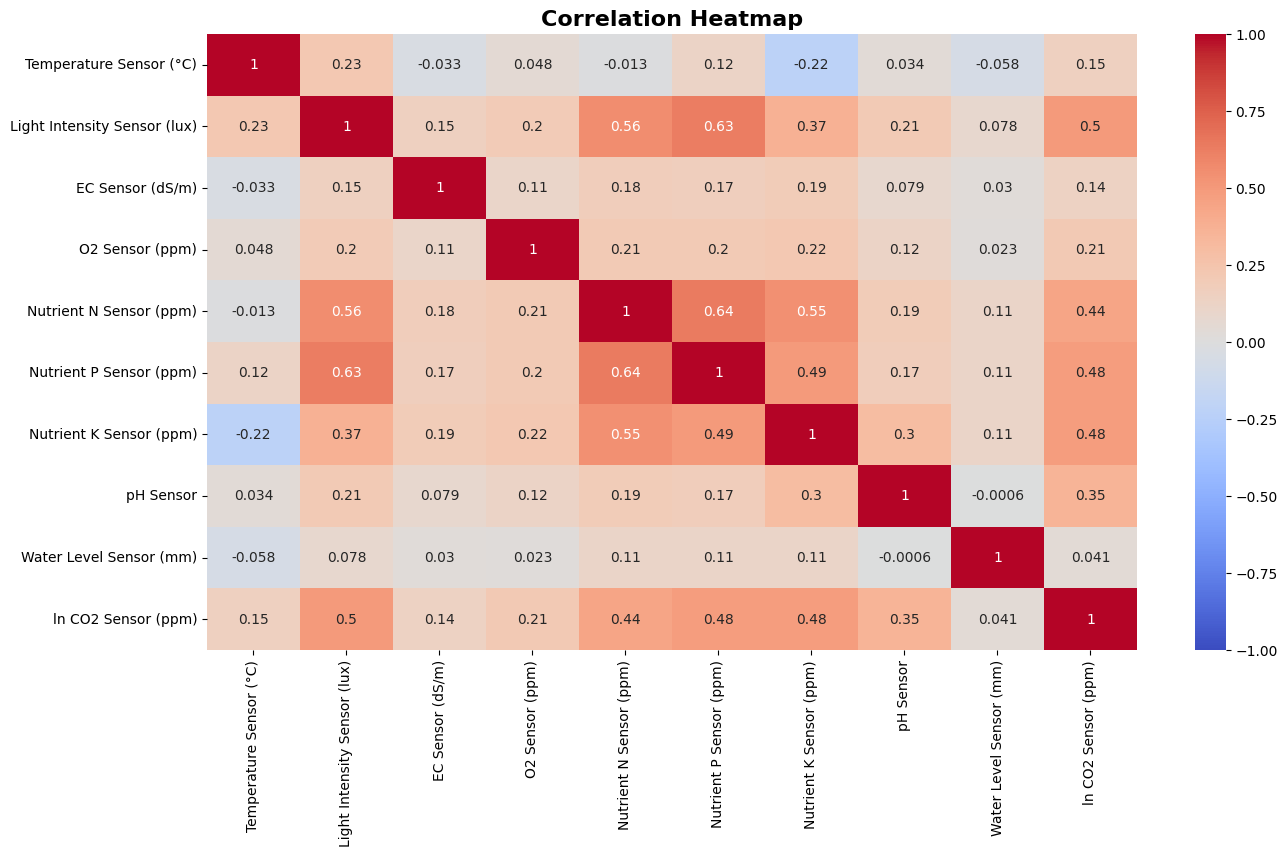

In [75]:
# Selecting numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting a correlation heatmap for the numeric dataset
plt.figure(figsize=(15, 8))
sns.heatmap(num_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.show()


From the heatmap, we observe positive correlation between temperature and 
- light intensity
- amount of nutrient P
- higher pH
- amount of CO2
  
Negative correlation between temperature and  
- amount of electrical conductivity
- amount of nutrient N
- amount of nutrient K
- water level

Except of light intensity, amount of nutrient K, amount of CO2 which have relatively strong correlation, the rest of features have weak correlation with temperature.

**2. Pairplot**

<Figure size 1000x800 with 0 Axes>

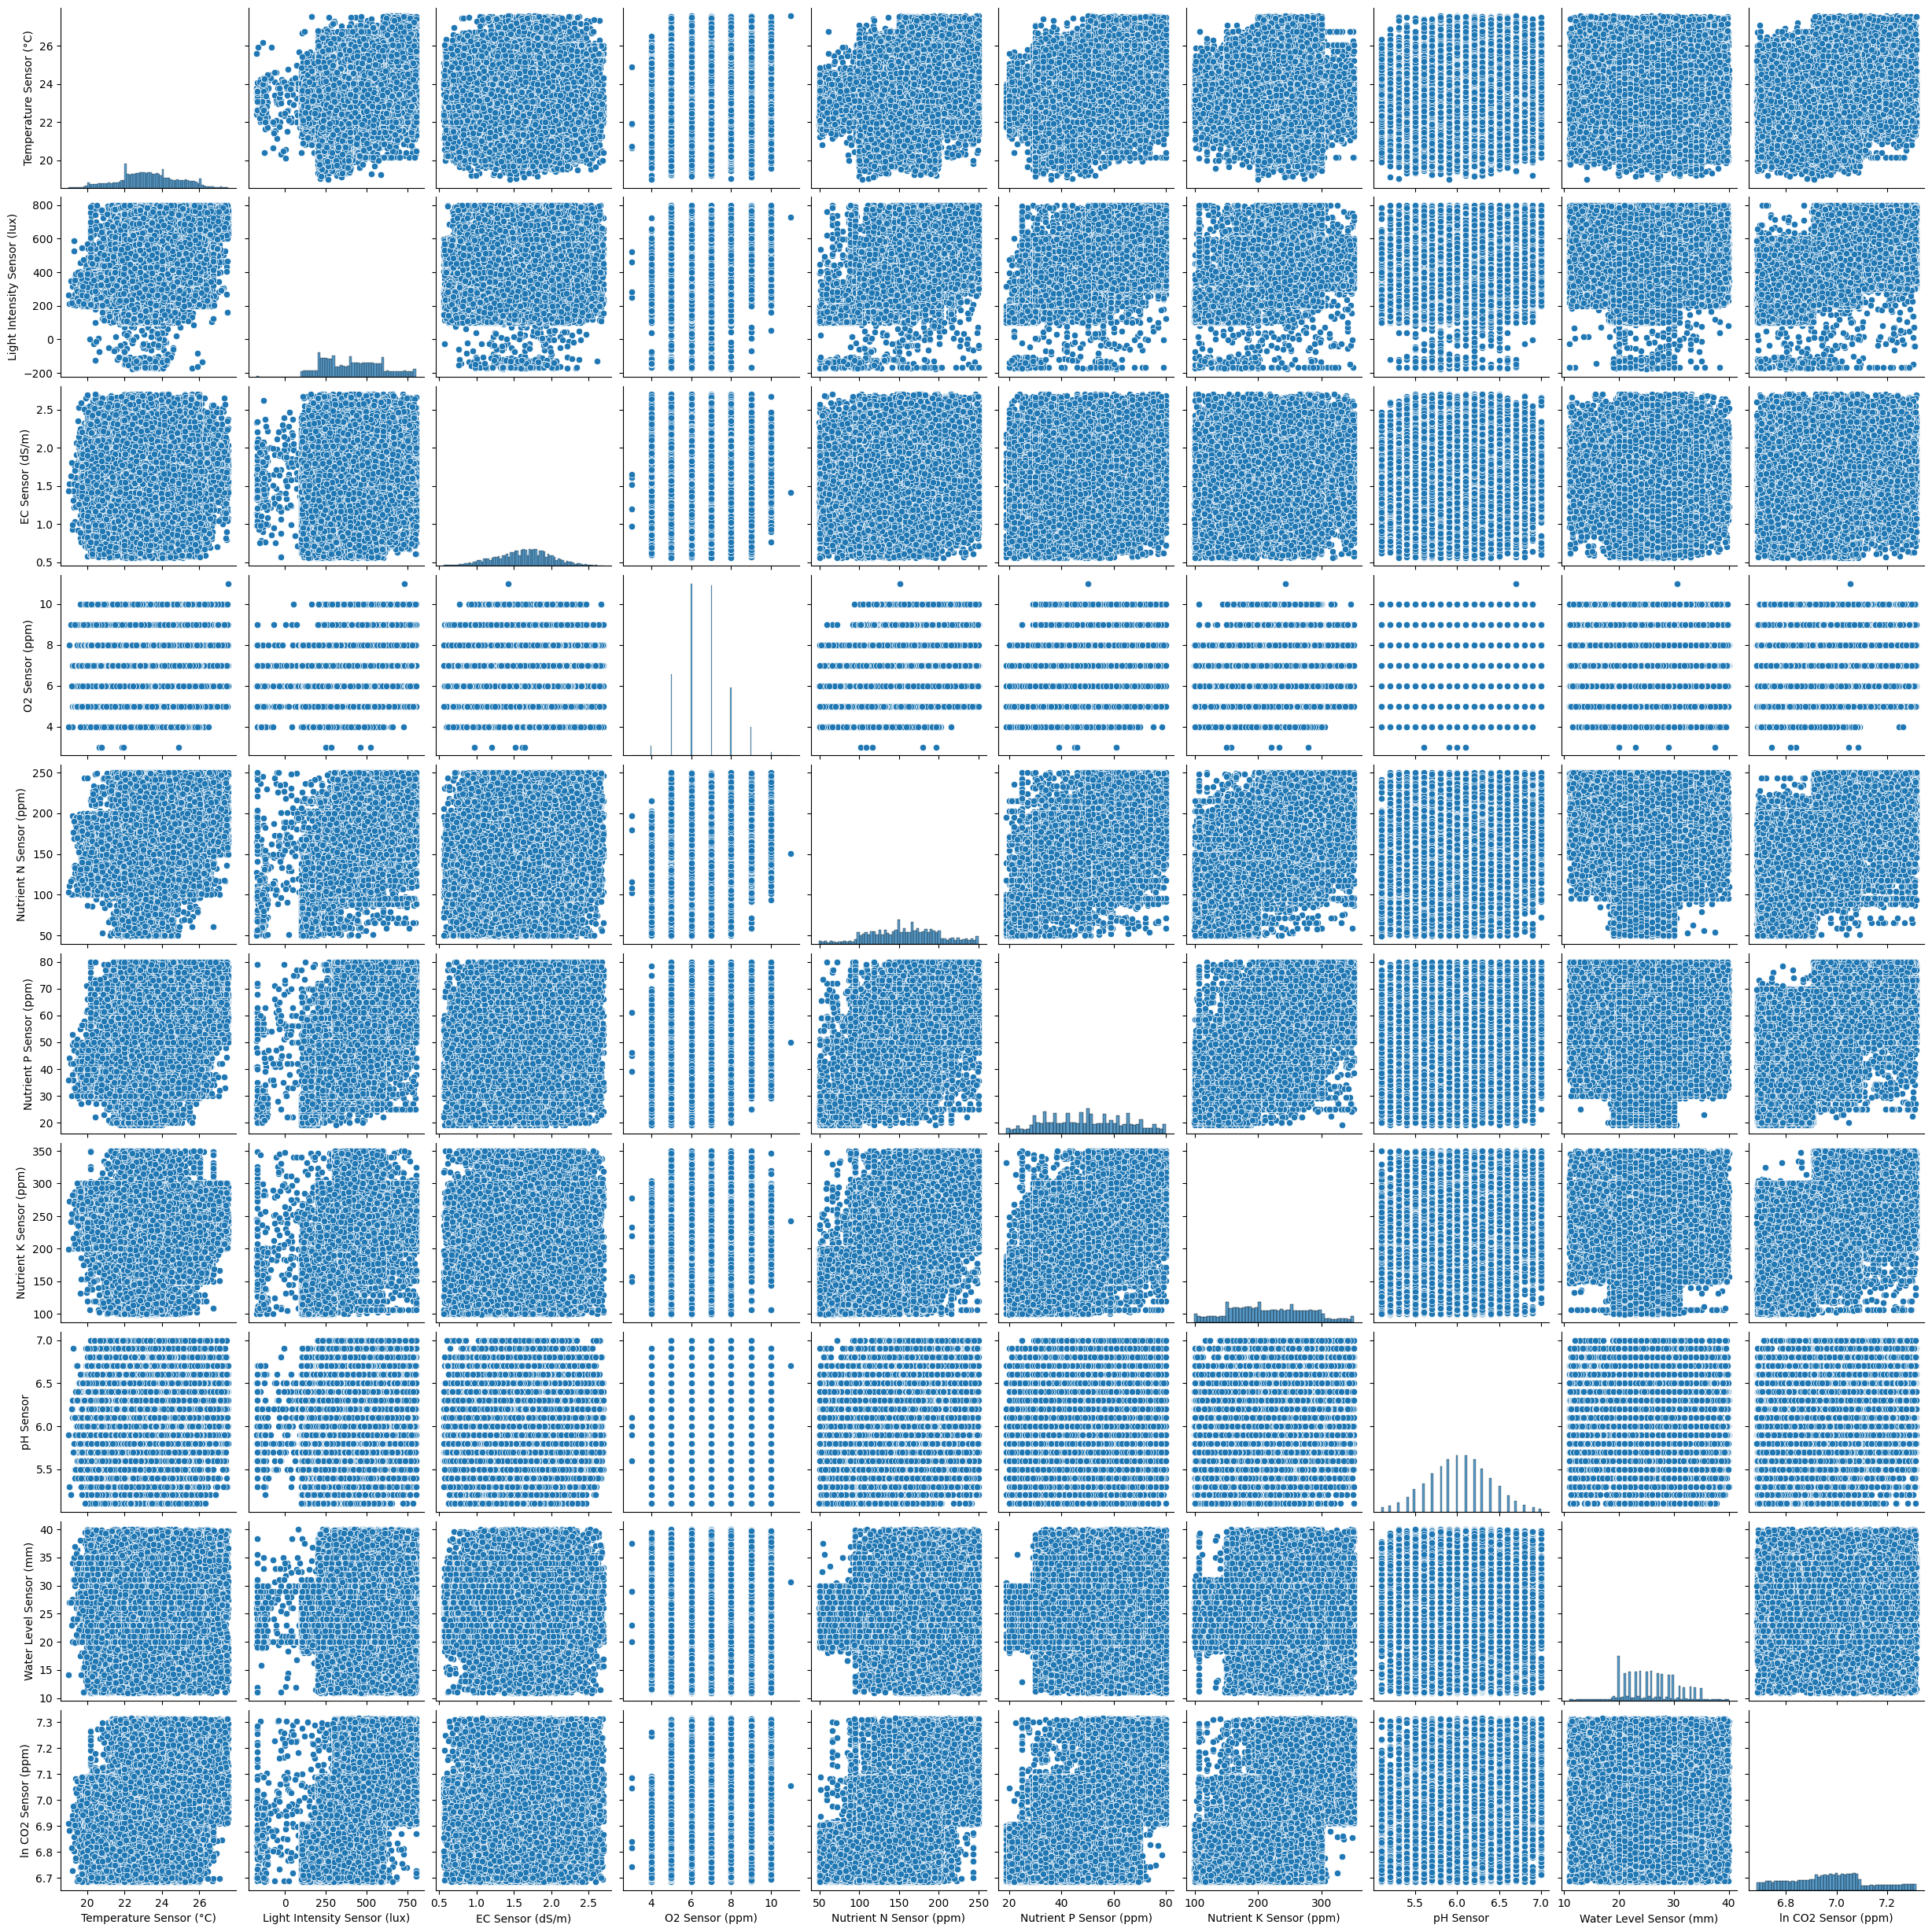

In [76]:
# Plotting pair plot for dataset
plt.figure(figsize=(10,8))
ax=sns.pairplot(num_df)
plt.show()

- We can conclude that variables like light intensity, amount of nutrient K, amount of CO2 are likely to cause rise in temperature, and we need to adjust these data accordingly to ensure optimal plamt growth conditions that is suitable for each type and stage of plants. 